<div id = 3 style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#b02222;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px;
           display:flex;
            justify-content:center;">

<h2 style="padding: 6rem;
              color:white;
          text-align:center;
          margin:10 auto;
          ">
    ITERATION 6: Focus on identifying and removing/imputing outliers


</h2>
</div>

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
import missingno as msno

import warnings

from functions_20221023 import get_columns, add_supplements, feature_engineer

In [71]:
VERSION = '07'

warnings.filterwarnings("ignore")

In [72]:
LABEL = 'Price'

columns, booleans, floats, categories, custom = get_columns(version=VERSION)

print(colored(f"features", "blue"), "-> ", columns)

columns.insert(0, LABEL)
print(colored(f"label", "green"), "-> ", LABEL)

features ->  ['bedrooms', 'bathrooms', 'nearestStation', 'location.latitude', 'location.longitude', 'latitude_deviation', 'longitude_deviation', 'tenure.tenureType', 'listingHistory.listingUpdateReason']
label ->  Price


In [73]:
IN_COLAB = False

filename = f'df_listings_v{VERSION}.csv'
#remote_pathname = f'https://raw.githubusercontent.com/jayportfolio/capstone_streamlit/main/data/final/{filename}'

df_pathname_raw = f'../../data/source/{filename}'
#df_pathname_tidy = f'../../data/final/{filename}'

df_orig = pd.read_csv(df_pathname_raw, on_bad_lines='error', index_col=0)

In [74]:
df = add_supplements(df_orig)
df = feature_engineer(df, version=VERSION)

In [75]:
df = df[columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54067 entries, 14520525 to 126181118
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Price                               54067 non-null  int64  
 1   bedrooms                            52265 non-null  float64
 2   bathrooms                           50569 non-null  float64
 3   nearestStation                      54067 non-null  float64
 4   location.latitude                   54057 non-null  float64
 5   location.longitude                  54067 non-null  float64
 6   latitude_deviation                  54057 non-null  float64
 7   longitude_deviation                 54067 non-null  float64
 8   tenure.tenureType                   50413 non-null  object 
 9   listingHistory.listingUpdateReason  54065 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 4.5+ MB


In [76]:
df.head()

Price  bedrooms  bathrooms  nearestStation  location.latitude  \
14520525  550000       3.0        1.0        0.274316          51.529950   
27953107  400000       2.0        2.0        0.305845          51.549390   
33593487  579950       2.0        1.0        0.438045          51.447180   
35271294  370000       2.0        1.0        0.399307          51.449568   
35429088  599950       2.0        1.0        0.238187          51.577030   

          location.longitude  latitude_deviation  longitude_deviation  \
14520525           -0.207020            0.030472             0.101800   
27953107           -0.482600            0.049912             0.377380   
33593487           -0.338770            0.052298             0.233550   
35271294           -0.140154            0.049910             0.034934   
35429088           -0.141230            0.077552             0.036010   

         tenure.tenureType listingHistory.listingUpdateReason  
14520525         LEASEHOLD                Added on 24/05/2022  
27953107         LEASEHOLD                Added on 16/06/2022  
33593487          FREEHOLD                Added on 11/07/2022  
35271294         LEASEHOLD                Added on 14/06/2021  
35429088               NaN                Added on 14/07/2015

In [160]:
try:
    df['date'] = df['listingHistory.listingUpdateReason'].str.extract('(\d\d/\d\d/\d\d\d\d)')
    df.drop('listingHistory.listingUpdateReason', axis=1, inplace=True)
except:
    pass

df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].map(pd.to_datetime)
df

Price  bedrooms  bathrooms  nearestStation  location.latitude  \
14520525   550000       3.0        1.0        0.274316          51.529950   
27953107   400000       2.0        2.0        0.305845          51.549390   
33593487   579950       2.0        1.0        0.438045          51.447180   
35271294   370000       2.0        1.0        0.399307          51.449568   
44749111   475000       2.0        1.0        0.410550          51.370050   
...           ...       ...        ...             ...                ...   
126179018  575000       2.0        1.0        0.682879          51.370651   
126179672  600000       3.0        2.0        0.545665          51.357170   
126180107  419999       2.0        1.0        0.191407          51.531415   
126180704  475000       2.0        1.0        0.308609          51.543141   
126181118  525000       2.0        1.0        0.238489          51.424589   

           location.longitude  latitude_deviation  longitude_deviation  \
14520525            -0.207020            0.030472             0.101800   
27953107            -0.482600            0.049912             0.377380   
33593487            -0.338770            0.052298             0.233550   
35271294            -0.140154            0.049910             0.034934   
44749111            -0.212410            0.129428             0.107190   
...                       ...                 ...                  ...   
126179018           -0.238346            0.128827             0.133126   
126179672           -0.074740            0.142308             0.030480   
126180107           -0.052964            0.031937             0.052256   
126180704            0.011498            0.043663             0.116718   
126181118           -0.206790            0.074889             0.101570   

           tenure.tenureType       date  central_distance  
14520525           LEASEHOLD 2022-05-24          0.106263  
27953107           LEASEHOLD 2022-06-16          0.380666  
33593487            FREEHOLD 2022-11-07          0.239334  
35271294           LEASEHOLD 2021-06-14          0.060921  
44749111            FREEHOLD 2021-11-10          0.168051  
...                      ...        ...               ...  
126179018           FREEHOLD 2022-08-18          0.185254  
126179672          LEASEHOLD 2022-08-18          0.145536  
126180107          LEASEHOLD 2022-08-18          0.061243  
126180704          LEASEHOLD 2022-08-18          0.124618  
126181118  SHARE_OF_FREEHOLD 2022-08-18          0.126194  

[45448 rows x 11 columns]

In [161]:
df.info()
df['date'].head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 45448 entries, 14520525 to 126181118
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Price                45448 non-null  int64         
 1   bedrooms             45448 non-null  float64       
 2   bathrooms            45448 non-null  float64       
 3   nearestStation       45448 non-null  float64       
 4   location.latitude    45448 non-null  float64       
 5   location.longitude   45448 non-null  float64       
 6   latitude_deviation   45448 non-null  float64       
 7   longitude_deviation  45448 non-null  float64       
 8   tenure.tenureType    45448 non-null  category      
 9   date                 45448 non-null  datetime64[ns]
 10  central_distance     45448 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(8), int64(1)
memory usage: 4.9+ MB


14520525   2022-05-24
27953107   2022-06-16
33593487   2022-11-07
35271294   2021-06-14
44749111   2021-11-10
46204665   2018-08-10
49020666   2021-11-10
49036279   2021-09-16
49303873   2022-03-28
52064391   2017-12-14
Name: date, dtype: datetime64[ns]

<AxesSubplot: >

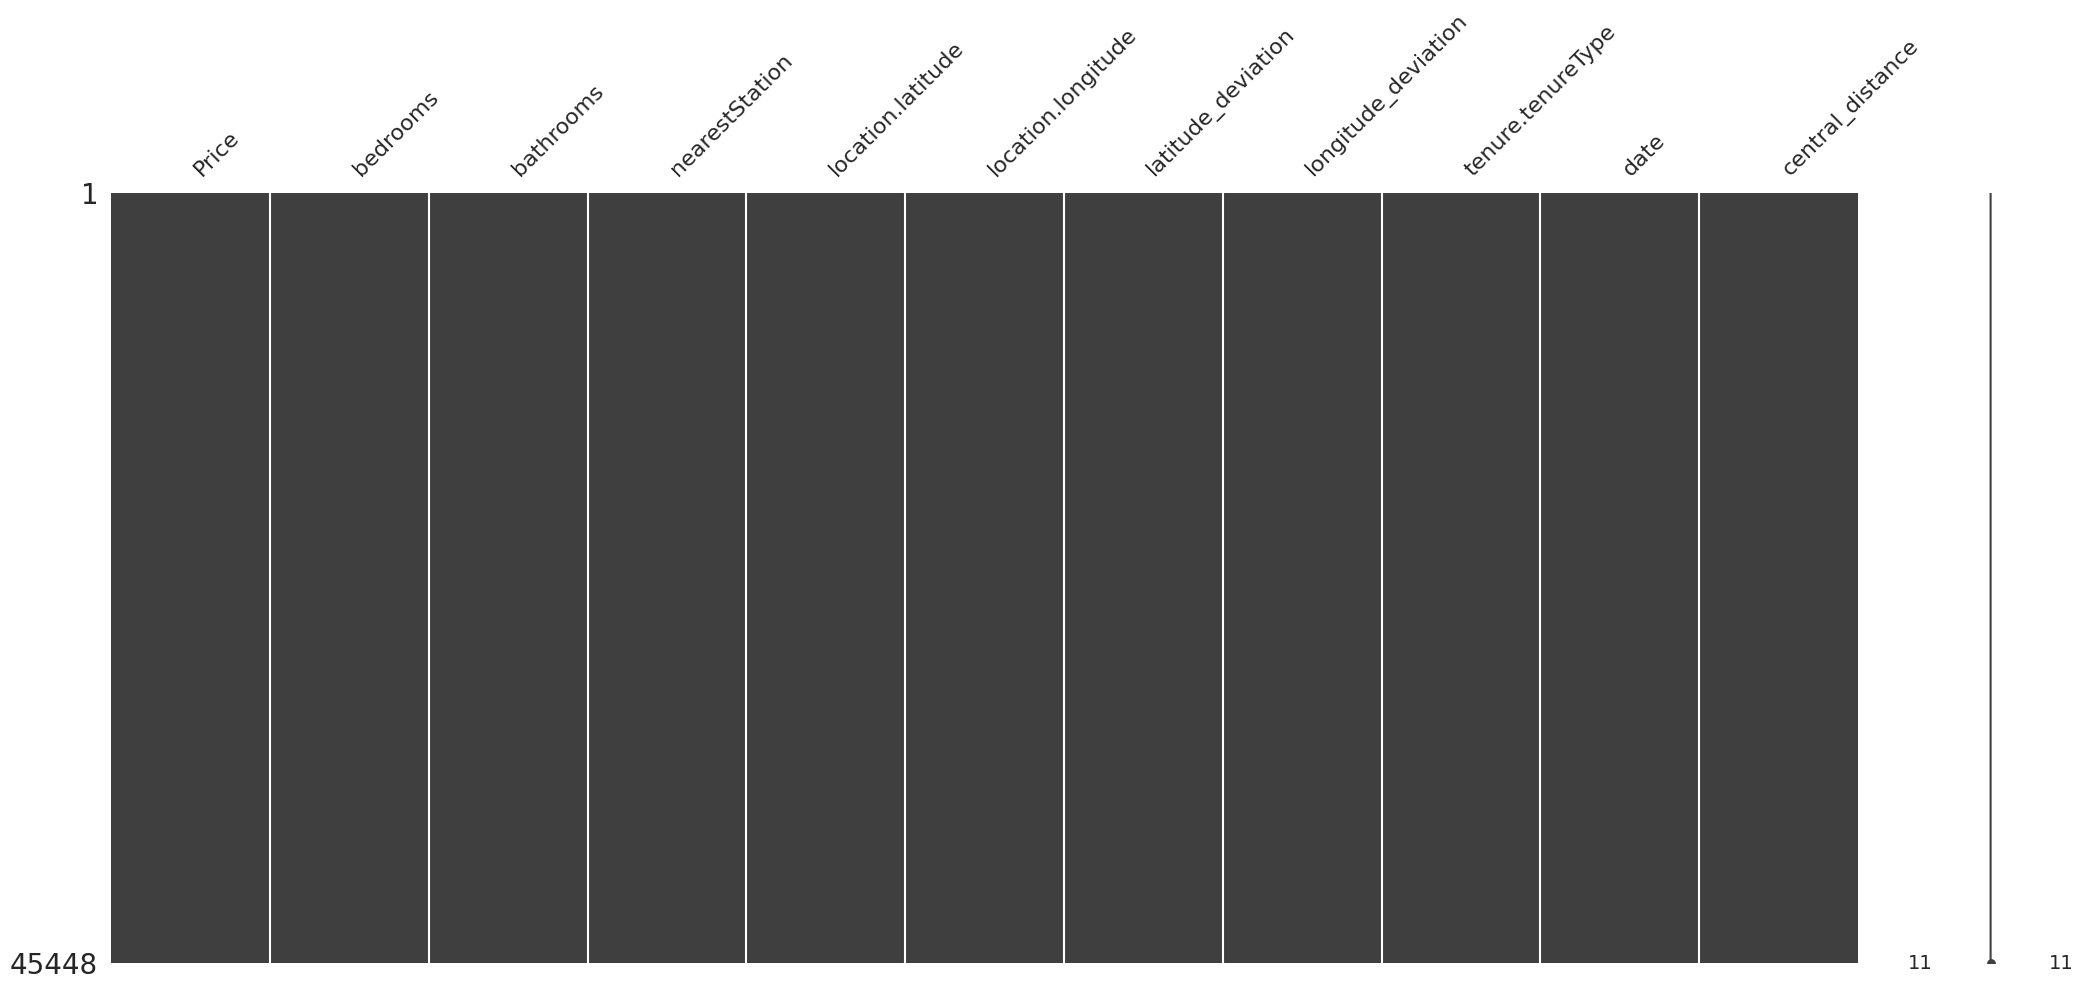

In [162]:
msno.matrix(df)

In [163]:
i = -1

bedrooms


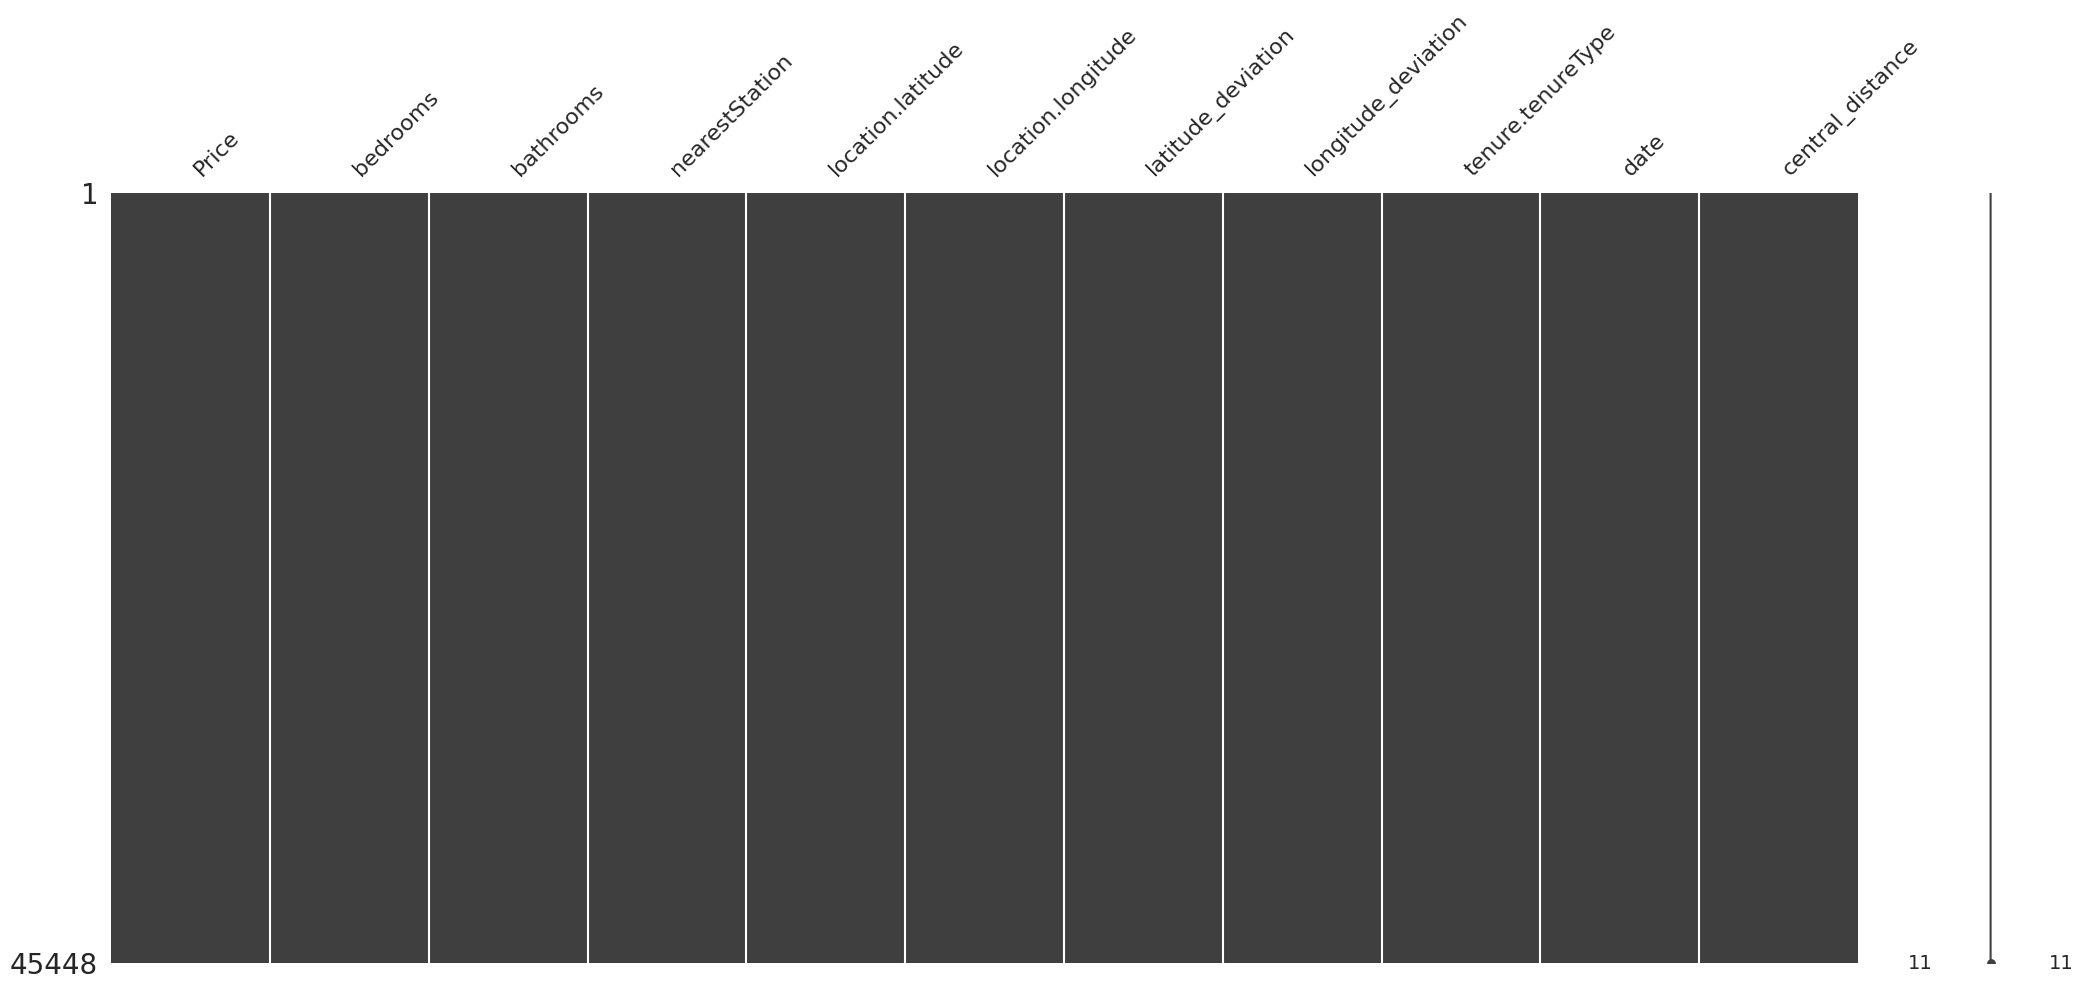

In [164]:
no_cols = ['bedrooms', 'bathrooms', 'tenure.tenureType']
i = (i + 1) % len(no_cols)
# Sort banking by age and visualize
df_sorted = df.sort_values(by=no_cols[i])
msno.matrix(df_sorted)
print(no_cols[i])
plt.show()

bathrooms


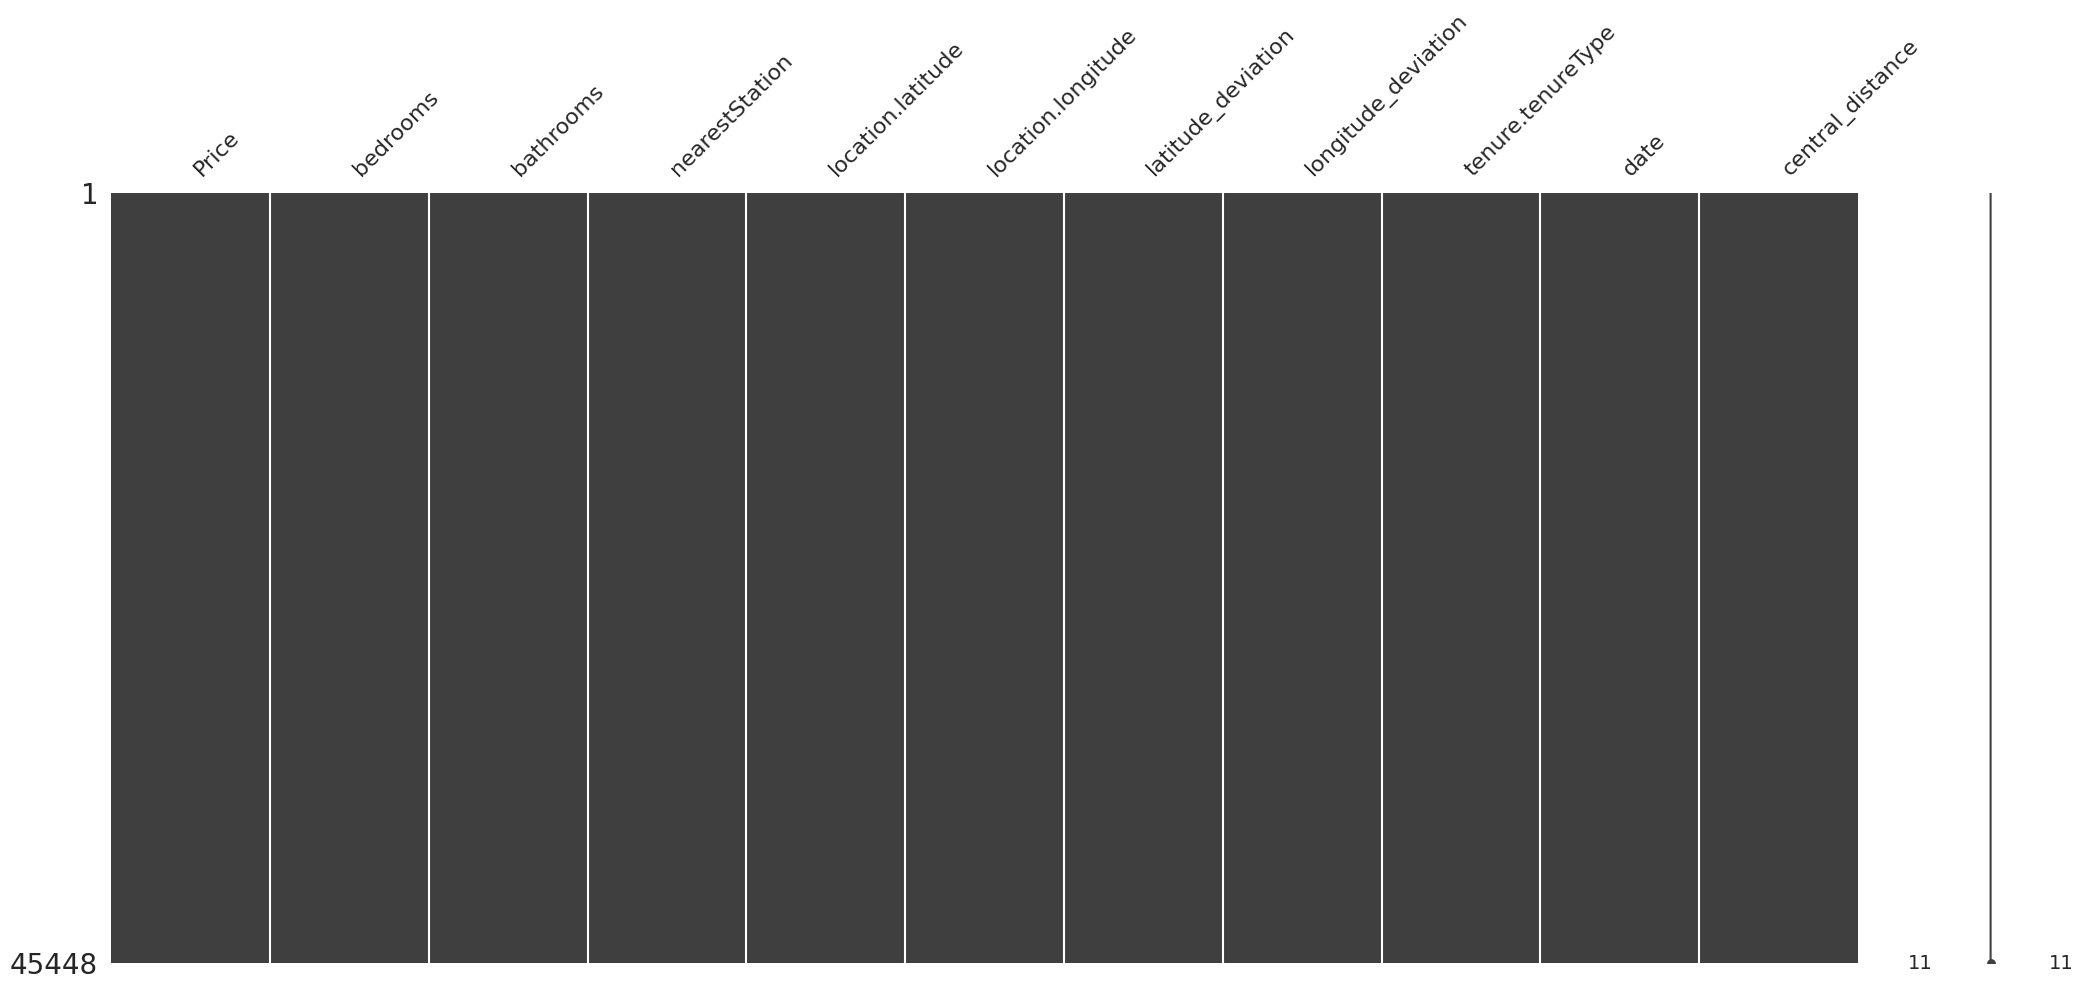

In [165]:
no_cols = ['bedrooms', 'bathrooms', 'tenure.tenureType']
i = (i + 1) % len(no_cols)
# Sort banking by age and visualize
df_sorted = df.sort_values(by=no_cols[i])
msno.matrix(df_sorted)
print(no_cols[i])
plt.show()

Conclusion: the missing data is missing completely at random. There is no correlation between missing data and any other factor which can be identified.

tenure.tenureType


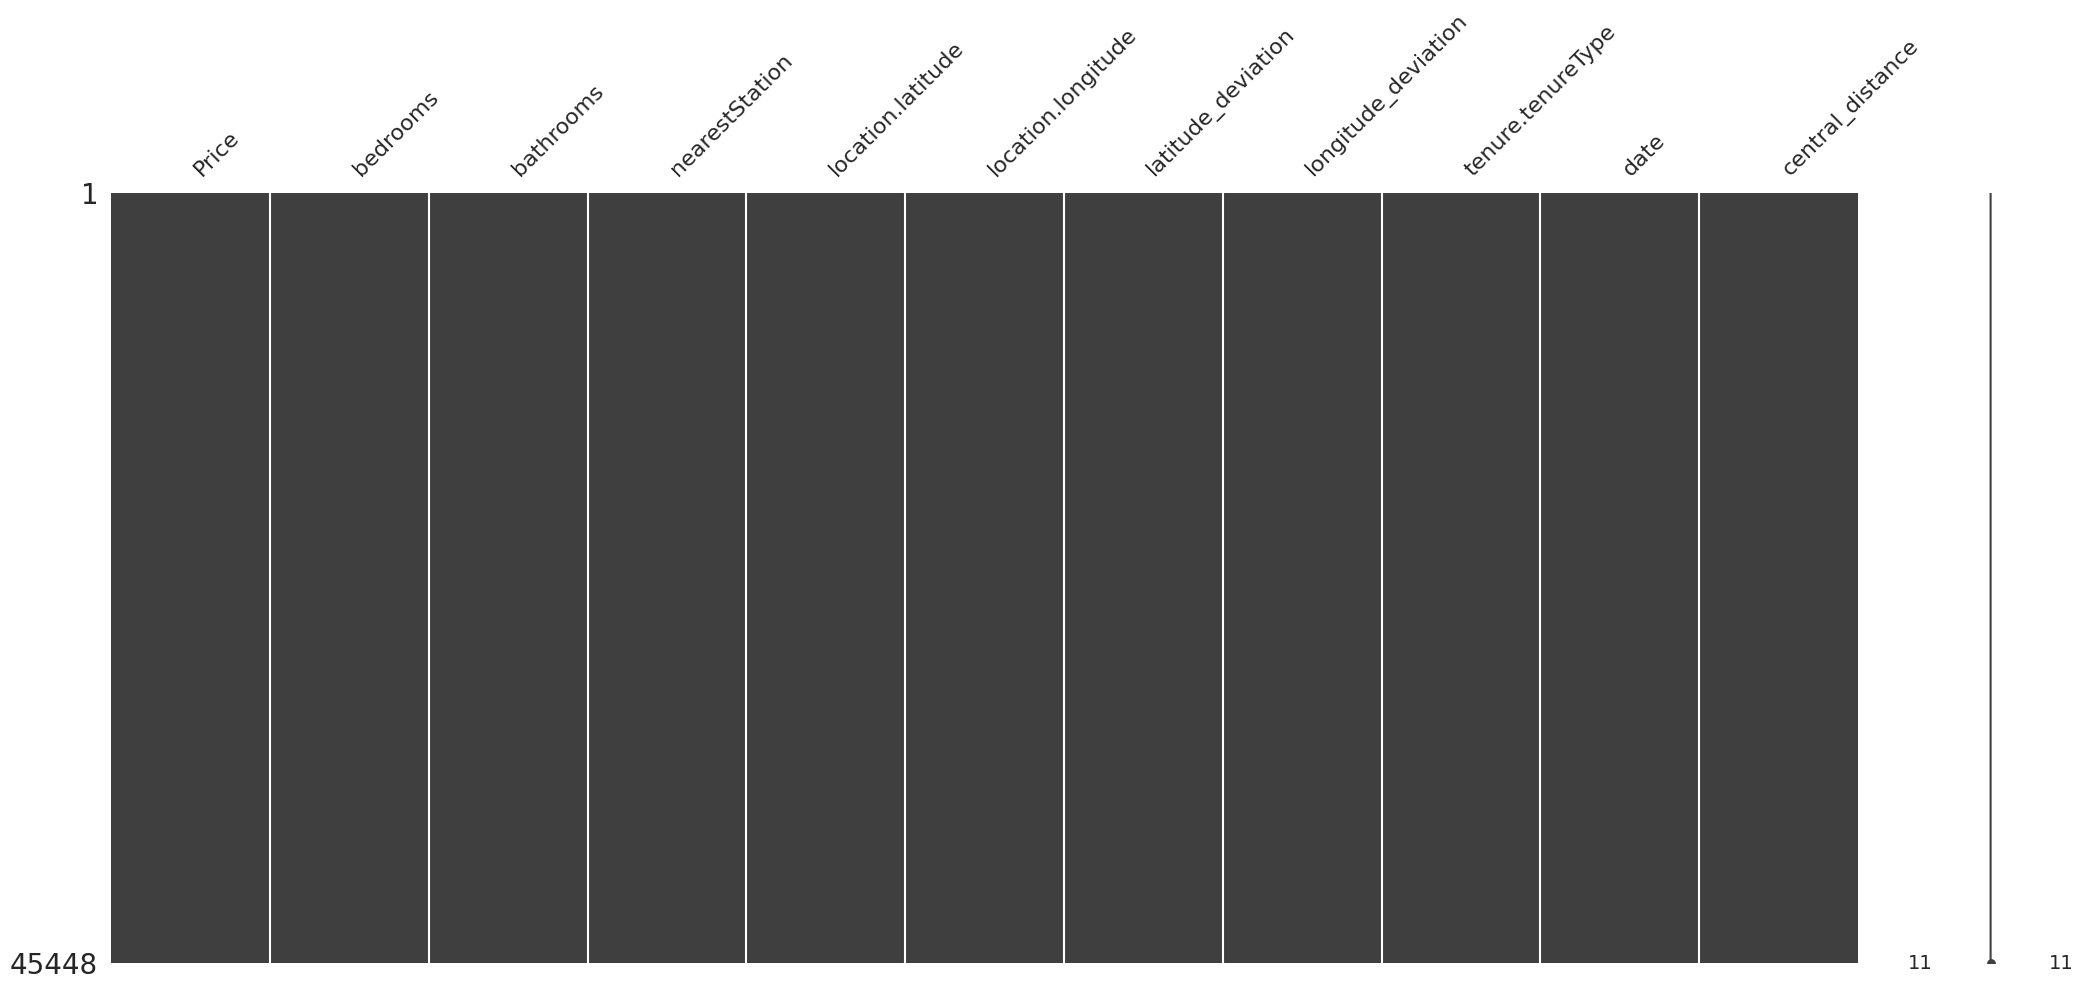

In [166]:
no_cols = ['bedrooms', 'bathrooms', 'tenure.tenureType']
i = (i + 1) % len(no_cols)
# Sort banking by age and visualize
df_sorted = df.sort_values(by=no_cols[i])
msno.matrix(df_sorted)
print(no_cols[i])
plt.show()

In [167]:
if False:
    import numpy as np

    def detect_outliers(name, data, thresholdP=3):
        outliers = []
        threshold = thresholdP
        try:
            mean = np.mean(data)
        except:
            print(f'error on {name}: partially or fully not numeric')
            return []
        std = np.std(data)

        for i in data:
            z_score = (i - mean) / std
            if np.abs(z_score) > threshold:
                outliers.append(i)
        return outliers


    def get_outlier_dataframe(thresholdA=3):
        outlier_df = pd.DataFrame()
        for each in df.columns:
            outl = detect_outliers(each, df[each], thresholdP=thresholdA)
            len_outl = len(outl)
            if len_outl > 10: outl = outl[:10]
            #print(f'outliers for {each} {len_outl}/{len(df[each])}: {outl}')

            x = pd.Series([outl, len_outl, f'{len_outl}/{len(df[each])}'])
            outlier_df[each] = x

        outlier_df.index = ['outliers', 'outlier_total', 'outlier_proportion']
        return outlier_df.T


    get_outlier_dataframe()

In [168]:
import numpy as np


def detect_outlier(name, data, q1_idx=25, q3_idx=75):
    # find q1 and q3 values

    if data.dtype in ['object','category']: return [], []
    data.dropna(inplace=True)
    q1, q3 = np.percentile(sorted(data), [q1_idx, q3_idx])

    # compute IRQ
    iqr = q3 - q1

    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    if data.dtype == float:
        outliers = np.array([x for x in data if x < lower_bound or x > upper_bound]).round(2)
        valid = np.array([x for x in data if lower_bound <= x <= upper_bound]).round(2)
    else:
        outliers = [x for x in data if x < lower_bound or x > upper_bound]
        valid = [x for x in data if lower_bound <= x <= upper_bound]

    return outliers, valid


outliers_df = pd.DataFrame()

for each in df.columns:
    outliers, valid = detect_outlier(each, df[each], q1_idx=0.1, q3_idx=99.9)

    min_outlier = min(outliers) if len(outliers) > 0 else None
    max_outlier = max(outliers) if len(outliers) > 0 else None

    min_valid = min(valid) if len(valid) > 0 else None
    max_valid = max(valid) if len(valid) > 0 else None

    under = [x for x in outliers if x < min_valid]
    under_max = min(under) if len(under) > 0 else None

    outl_series = pd.Series([sorted(set(outliers)), sorted(list(set(valid))), len(outliers), len(df), under_max, min_valid, max_valid, min_outlier, max_outlier])
    outliers_df[each] = outl_series

outliers_df.index = ['outliers', 'valid','count', 'totol_entries', 'under_outlr', 'min_valid', 'max_valid', 'min_outlr', 'max_outlr']
outliers_df.T


outliers  \
Price                     []   
bedrooms                  []   
bathrooms                 []   
nearestStation            []   
location.latitude         []   
location.longitude        []   
latitude_deviation        []   
longitude_deviation       []   
tenure.tenureType         []   
date                      []   
central_distance          []   

                                                                 valid count  \
Price                [100000, 100500, 101250, 102000, 102500, 10312...     0   
bedrooms                           [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]     0   
bathrooms                                    [1.0, 2.0, 3.0, 4.0, 5.0]     0   
nearestStation       [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...     0   
location.latitude    [51.3, 51.31, 51.32, 51.33, 51.34, 51.35, 51.3...     0   
location.longitude   [-0.5, -0.49, -0.48, -0.47, -0.46, -0.45, -0.4...     0   
latitude_deviation   [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...     0   
longitude_deviation  [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...     0   
tenure.tenureType                                                   []     0   
date                 [2016-03-12 00:00:00, 2017-07-07 00:00:00, 201...     0   
central_distance     [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...     0   

                    totol_entries under_outlr            min_valid  \
Price                       45448        None               100000   
bedrooms                    45448        None                  1.0   
bathrooms                   45448        None                  1.0   
nearestStation              45448        None                  0.0   
location.latitude           45448        None                 51.3   
location.longitude          45448        None                 -0.5   
latitude_deviation          45448        None                  0.0   
longitude_deviation         45448        None                  0.0   
tenure.tenureType           45448        None                 None   
date                        45448        None  2016-03-12 00:00:00   
central_distance            45448        None                  0.0   

                               max_valid min_outlr max_outlr  
Price                             600000      None      None  
bedrooms                             7.0      None      None  
bathrooms                            5.0      None      None  
nearestStation                      3.69      None      None  
location.latitude                  51.68      None      None  
location.longitude                  0.28      None      None  
latitude_deviation                   0.2      None      None  
longitude_deviation                 0.39      None      None  
tenure.tenureType                   None      None      None  
date                 2022-12-08 00:00:00      None      None  
central_distance                    0.41      None      None

<AxesSubplot: >

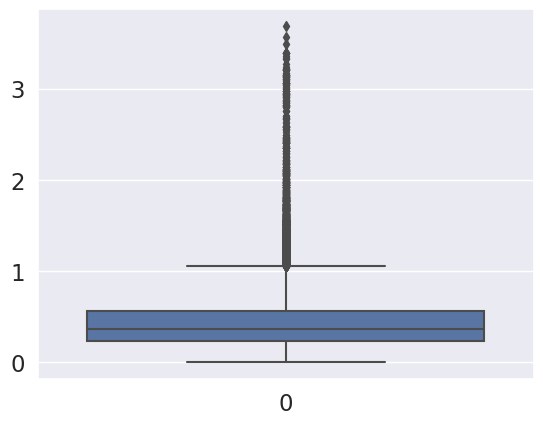

In [169]:
# Box Plot
import seaborn as sns

sns.boxplot(df['nearestStation'])

In [170]:
print(len(df_orig))
old_length = len(df_orig)

print(f"{old_length} ==> {len(df)}")
old_length = len(df)

54067
54067 ==> 45448


In [171]:
df['tenure.tenureType'] = df['tenure.tenureType'].astype('category')

print(f"{old_length} ==> {len(df)}")
old_length = len(df)

45448 ==> 45448


In [172]:
df.describe().T

count           mean            std            min  \
Price                45448.0  421306.624164  110722.486538  100000.000000   
bedrooms             45448.0       1.980857       0.823010       1.000000   
bathrooms            45448.0       1.185377       0.411488       1.000000   
nearestStation       45448.0       0.435404       0.319498       0.000000   
location.latitude    45448.0      51.495933       0.077547      51.298317   
location.longitude   45448.0      -0.113922       0.155743      -0.498315   
latitude_deviation   45448.0       0.064672       0.042936       0.000000   
longitude_deviation  45448.0       0.123526       0.095250       0.000000   
central_distance     45448.0       0.153514       0.082405       0.000683   

                               25%            50%            75%  \
Price                339983.750000  425000.000000  500000.000000   
bedrooms                  1.000000       2.000000       2.000000   
bathrooms                 1.000000       1.000000       1.000000   
nearestStation            0.225384       0.365839       0.556579   
location.latitude        51.437319      51.498232      51.555636   
location.longitude       -0.211164      -0.103070      -0.011817   
latitude_deviation        0.028738       0.058940       0.094838   
longitude_deviation       0.043226       0.098472       0.191662   
central_distance          0.091709       0.137882       0.204140   

                               max  
Price                600000.000000  
bedrooms                  7.000000  
bathrooms                 5.000000  
nearestStation            3.687893  
location.latitude        51.683185  
location.longitude        0.279726  
latitude_deviation        0.201161  
longitude_deviation       0.393095  
central_distance          0.409263

In [202]:
df.describe(include=['datetime64'], exclude=[]).T

count unique        top freq      first       last
date  45448    767 2022-06-21  426 2016-03-12 2022-12-08

In [203]:
df.describe(include=['object', 'category','datetime64'], exclude=[]).T

count unique                  top   freq      first  \
tenure.tenureType  45448      4            LEASEHOLD  28250        NaT   
date               45448    767  2022-06-21 00:00:00    426 2016-03-12   

                        last  
tenure.tenureType        NaT  
date              2022-12-08

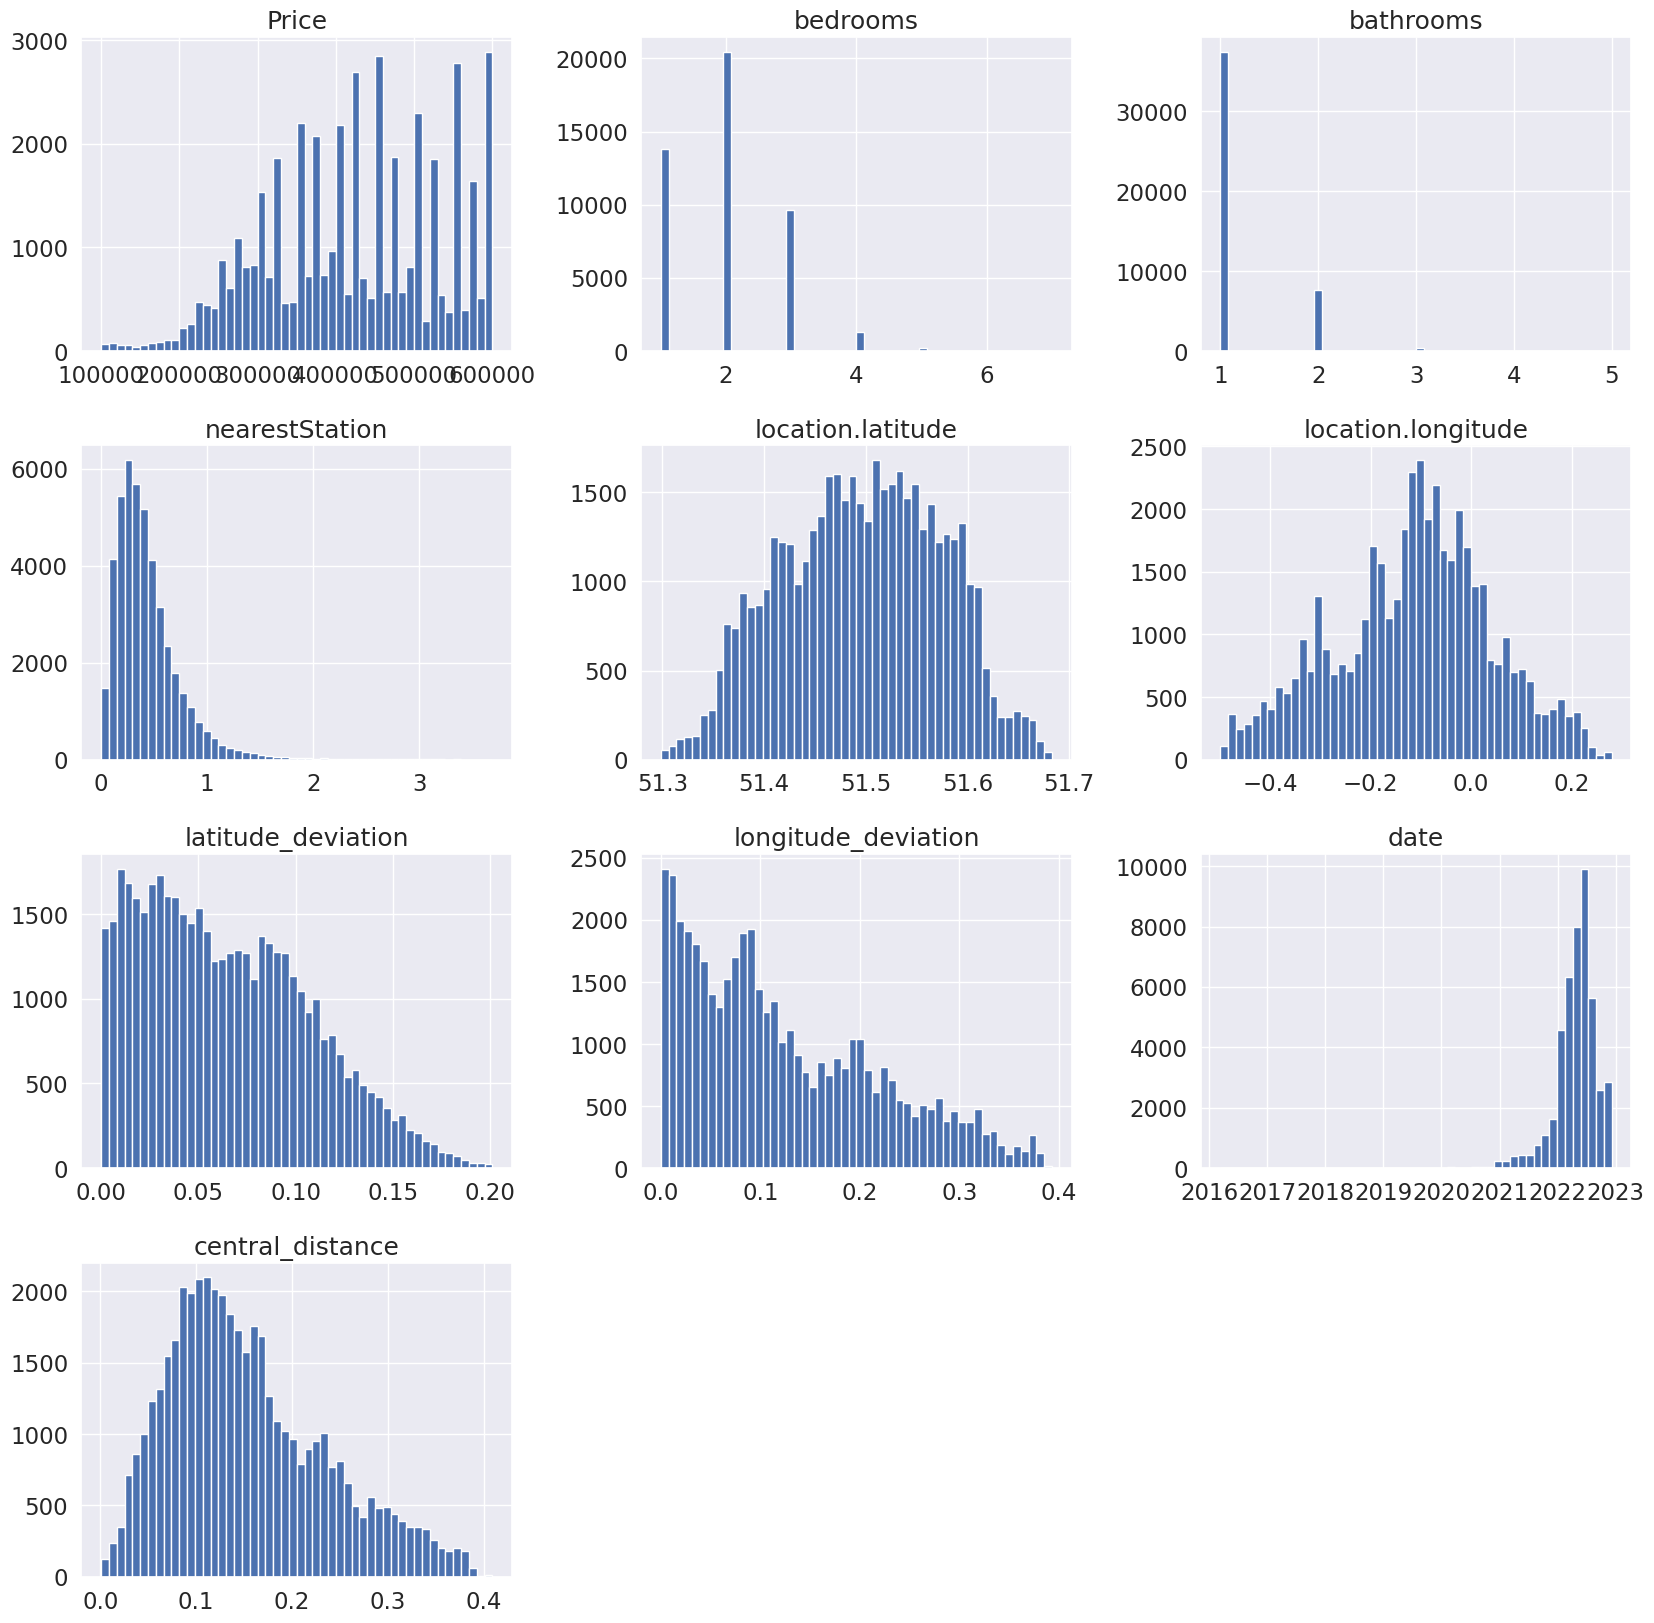

In [174]:
%matplotlib inline
df.hist(bins=50, figsize=(20, 20))
plt.show()

<div id = 3 style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#b08888;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px;
           display:flex;
            justify-content:center;">

<h2 style="padding: 2rem;
              color:white;
          text-align:center;
          margin:0 auto;
          ">
    IDENTIFY OUTLIERS


</h2>
</div>

In [175]:
df.isna().sum()

Price                  0
bedrooms               0
bathrooms              0
nearestStation         0
location.latitude      0
location.longitude     0
latitude_deviation     0
longitude_deviation    0
tenure.tenureType      0
date                   0
central_distance       0
dtype: int64

In [176]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['bedrooms'] > 5].sort_values('bedrooms', ascending=False)

Price  bedrooms  bathrooms  nearestStation  location.latitude  \
125880485  600000       7.0        5.0        0.592204          51.440830   
119217689  525000       7.0        2.0        0.393151          51.538560   
124019570  600000       7.0        2.0        0.909304          51.529453   
84063621   600000       6.0        2.0        0.525190          51.662239   
123693851  535000       6.0        3.0        0.416445          51.643021   
125568515  575000       6.0        3.0        1.334739          51.527980   
125047877  525000       6.0        3.0        0.592597          51.659081   
125000246  525000       6.0        2.0        0.118946          51.489867   
124064753  599950       6.0        3.0        0.330673          51.392482   
123811142  600000       6.0        1.0        0.758594          51.474324   
122834111  499995       6.0        4.0        0.514528          51.482780   
84739572   600000       6.0        2.0        0.836096          51.396383   
122436188  600000       6.0        5.0        0.157157          51.516180   
120996098  560000       6.0        2.0        0.165819          51.369340   
120366419  400000       6.0        2.0        0.339003          51.451404   
120165197  550000       6.0        3.0        0.406018          51.543911   
116167328  600000       6.0        3.0        0.725541          51.460215   
115579406  550000       6.0        3.0        0.326105          51.506092   
111897098  580000       6.0        4.0        0.392721          51.545448   
125898833  575000       6.0        3.0        1.077764          51.449267   

           location.longitude  latitude_deviation  longitude_deviation  \
125880485           -0.038410            0.058648             0.066810   
119217689            0.118210            0.039082             0.223430   
124019570            0.184820            0.029975             0.290040   
84063621            -0.035894            0.162761             0.069326   
123693851           -0.048691            0.143543             0.056529   
125568515           -0.461629            0.028502             0.356409   
125047877           -0.042710            0.159603             0.062510   
125000246            0.055150            0.009611             0.160370   
124064753           -0.296887            0.106996             0.191667   
123811142            0.131402            0.025154             0.236622   
122834111            0.089120            0.016698             0.194340   
84739572            -0.120228            0.103095             0.015008   
122436188            0.056490            0.016702             0.161710   
120996098           -0.114890            0.130138             0.009670   
120366419           -0.017425            0.048074             0.087795   
120165197            0.075780            0.044433             0.181000   
116167328           -0.335873            0.039263             0.230653   
115579406           -0.476882            0.006614             0.371662   
111897098            0.051230            0.045970             0.156450   
125898833            0.106676            0.050211             0.211896   

          tenure.tenureType       date  central_distance  
125880485          FREEHOLD 2022-09-08          0.088900  
119217689          FREEHOLD 2022-01-27          0.226822  
124019570          FREEHOLD 2022-09-08          0.291585  
84063621           FREEHOLD 2022-02-23          0.176910  
123693851          FREEHOLD 2022-05-26          0.154273  
125568515          FREEHOLD 2022-01-08          0.357547  
125047877          FREEHOLD 2022-07-16          0.171408  
125000246          FREEHOLD 2022-07-15          0.160658  
124064753          FREEHOLD 2022-07-29          0.219509  
123811142          FREEHOLD 2022-01-06          0.237955  
122834111          FREEHOLD 2022-04-26          0.195056  
84739572           FREEHOLD 2022-04-27          0.104182  
122436188          FREEHOLD 2022-04-14          0.162570  
120996098    

In [177]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['bedrooms'] > 10].sort_values('bedrooms', ascending=False)

Empty DataFrame
Columns: [Price, bedrooms, bathrooms, nearestStation, location.latitude, location.longitude, latitude_deviation, longitude_deviation, tenure.tenureType, date, central_distance]
Index: []

In [178]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['bathrooms'] > 5]

Empty DataFrame
Columns: [Price, bedrooms, bathrooms, nearestStation, location.latitude, location.longitude, latitude_deviation, longitude_deviation, tenure.tenureType, date, central_distance]
Index: []

In [179]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['longitude_deviation'] > 1]

Empty DataFrame
Columns: [Price, bedrooms, bathrooms, nearestStation, location.latitude, location.longitude, latitude_deviation, longitude_deviation, tenure.tenureType, date, central_distance]
Index: []

In [180]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['latitude_deviation'] > 1]

Empty DataFrame
Columns: [Price, bedrooms, bathrooms, nearestStation, location.latitude, location.longitude, latitude_deviation, longitude_deviation, tenure.tenureType, date, central_distance]
Index: []

In [181]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['nearestStation'] > 20]

Empty DataFrame
Columns: [Price, bedrooms, bathrooms, nearestStation, location.latitude, location.longitude, latitude_deviation, longitude_deviation, tenure.tenureType, date, central_distance]
Index: []

In [182]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['nearestStation'] > 4].sort_values('nearestStation', ascending=False)

Empty DataFrame
Columns: [Price, bedrooms, bathrooms, nearestStation, location.latitude, location.longitude, latitude_deviation, longitude_deviation, tenure.tenureType, date, central_distance]
Index: []

In [183]:
df = df[(df['bedrooms'] <= 10)]
df = df[df['bathrooms'] <= 5]
df = df[((df['longitude_deviation'] <= 1) & (df['latitude_deviation'] <= 1))]
df = df[(df['nearestStation'] <= 4)]

print(f"{old_length} ==> {len(df)}")
old_length = len(df)

df.describe().T

45448 ==> 45448


count           mean            std            min  \
Price                45448.0  421306.624164  110722.486538  100000.000000   
bedrooms             45448.0       1.980857       0.823010       1.000000   
bathrooms            45448.0       1.185377       0.411488       1.000000   
nearestStation       45448.0       0.435404       0.319498       0.000000   
location.latitude    45448.0      51.495933       0.077547      51.298317   
location.longitude   45448.0      -0.113922       0.155743      -0.498315   
latitude_deviation   45448.0       0.064672       0.042936       0.000000   
longitude_deviation  45448.0       0.123526       0.095250       0.000000   
central_distance     45448.0       0.153514       0.082405       0.000683   

                               25%            50%            75%  \
Price                339983.750000  425000.000000  500000.000000   
bedrooms                  1.000000       2.000000       2.000000   
bathrooms                 1.000000       1.000000       1.000000   
nearestStation            0.225384       0.365839       0.556579   
location.latitude        51.437319      51.498232      51.555636   
location.longitude       -0.211164      -0.103070      -0.011817   
latitude_deviation        0.028738       0.058940       0.094838   
longitude_deviation       0.043226       0.098472       0.191662   
central_distance          0.091709       0.137882       0.204140   

                               max  
Price                600000.000000  
bedrooms                  7.000000  
bathrooms                 5.000000  
nearestStation            3.687893  
location.latitude        51.683185  
location.longitude        0.279726  
latitude_deviation        0.201161  
longitude_deviation       0.393095  
central_distance          0.409263

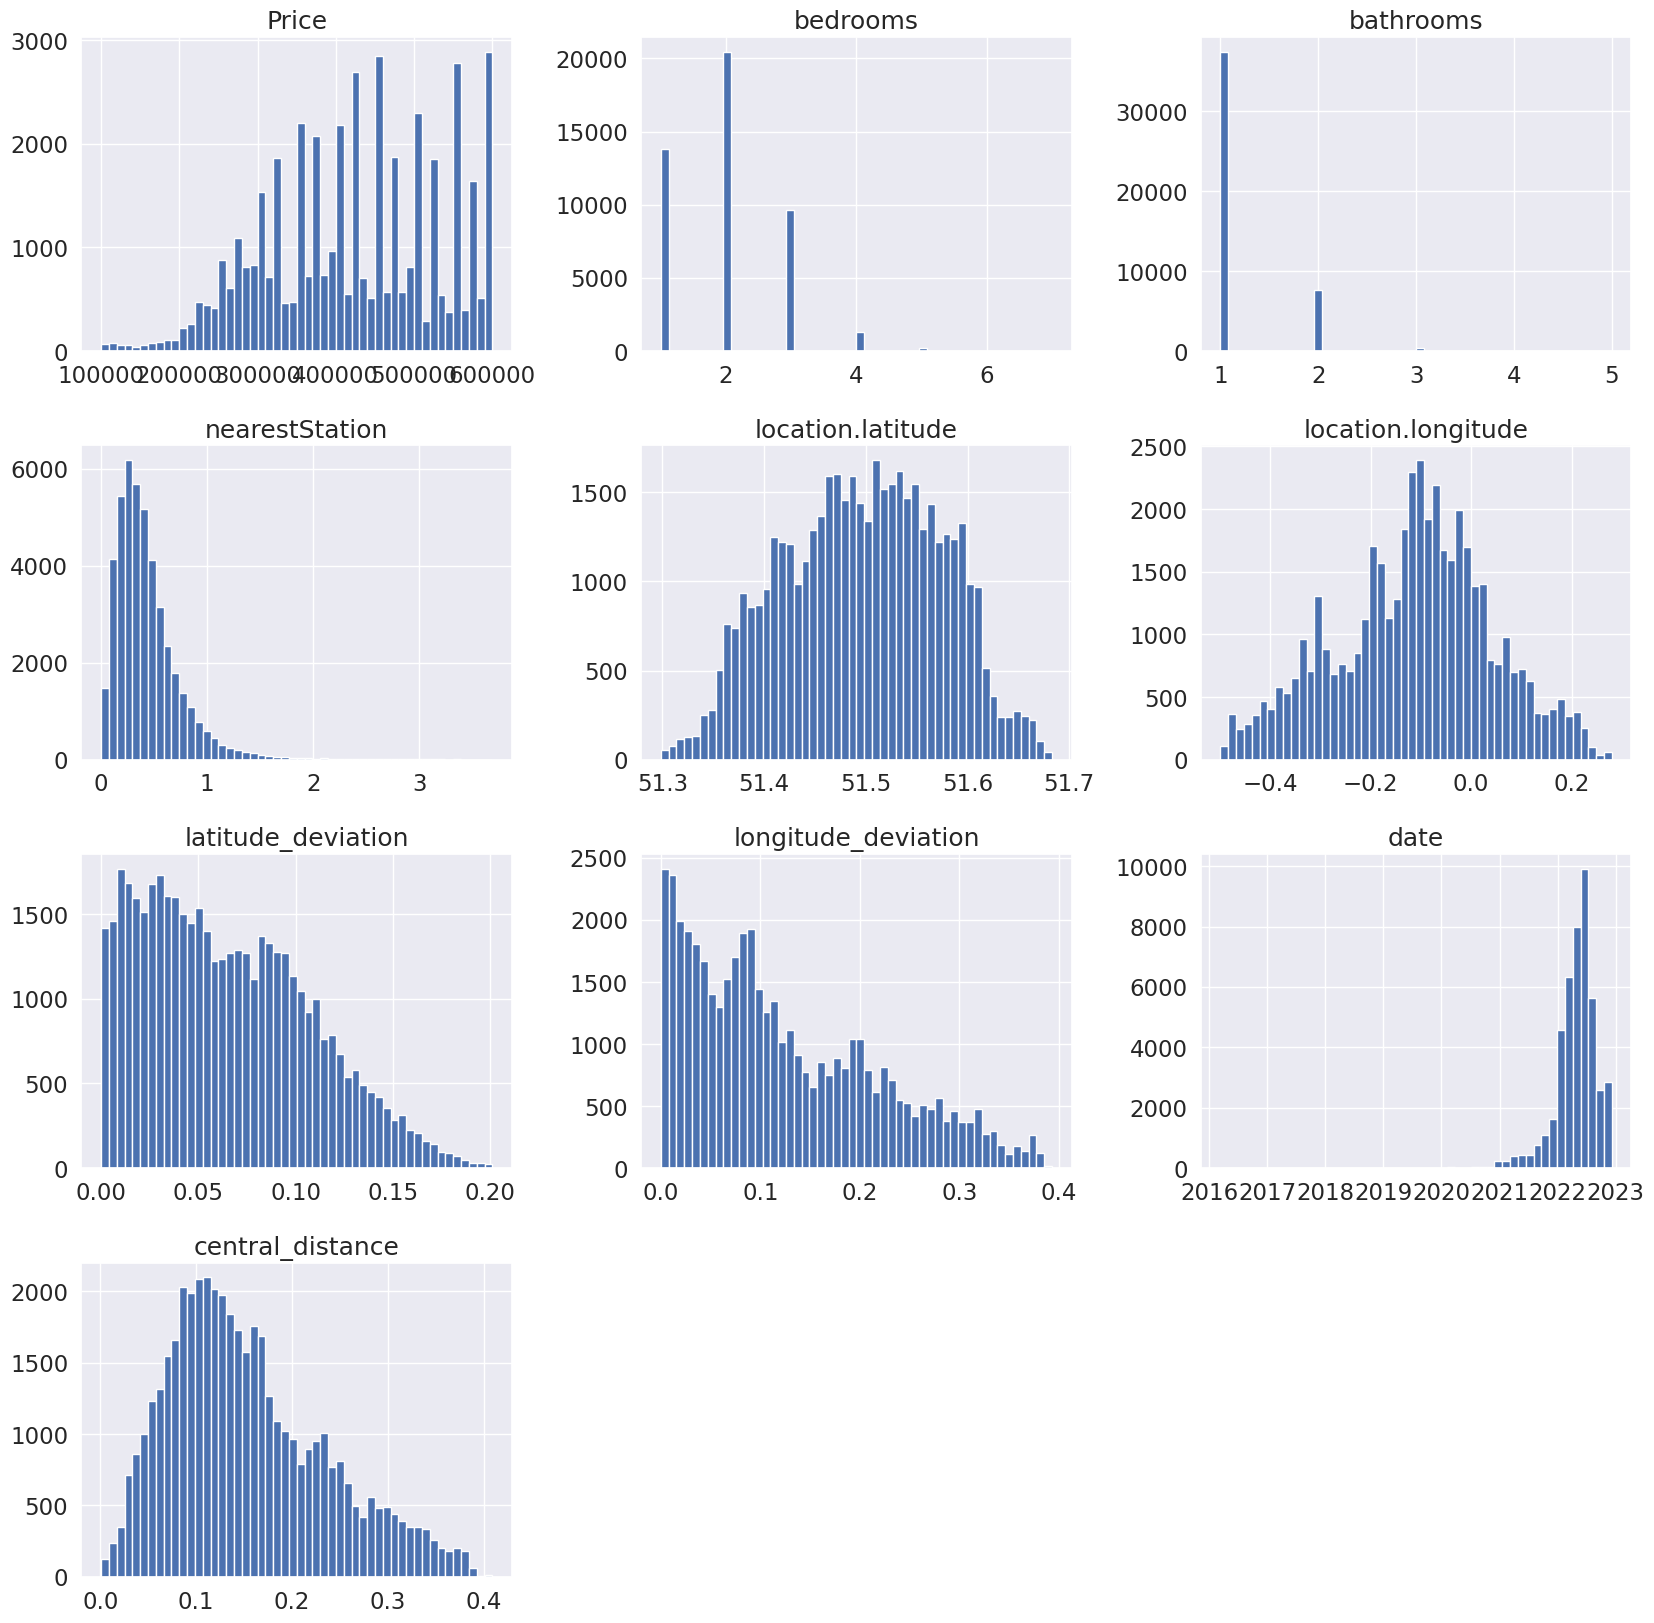

In [184]:
df.hist(bins=50, figsize=(20, 20))
plt.show()

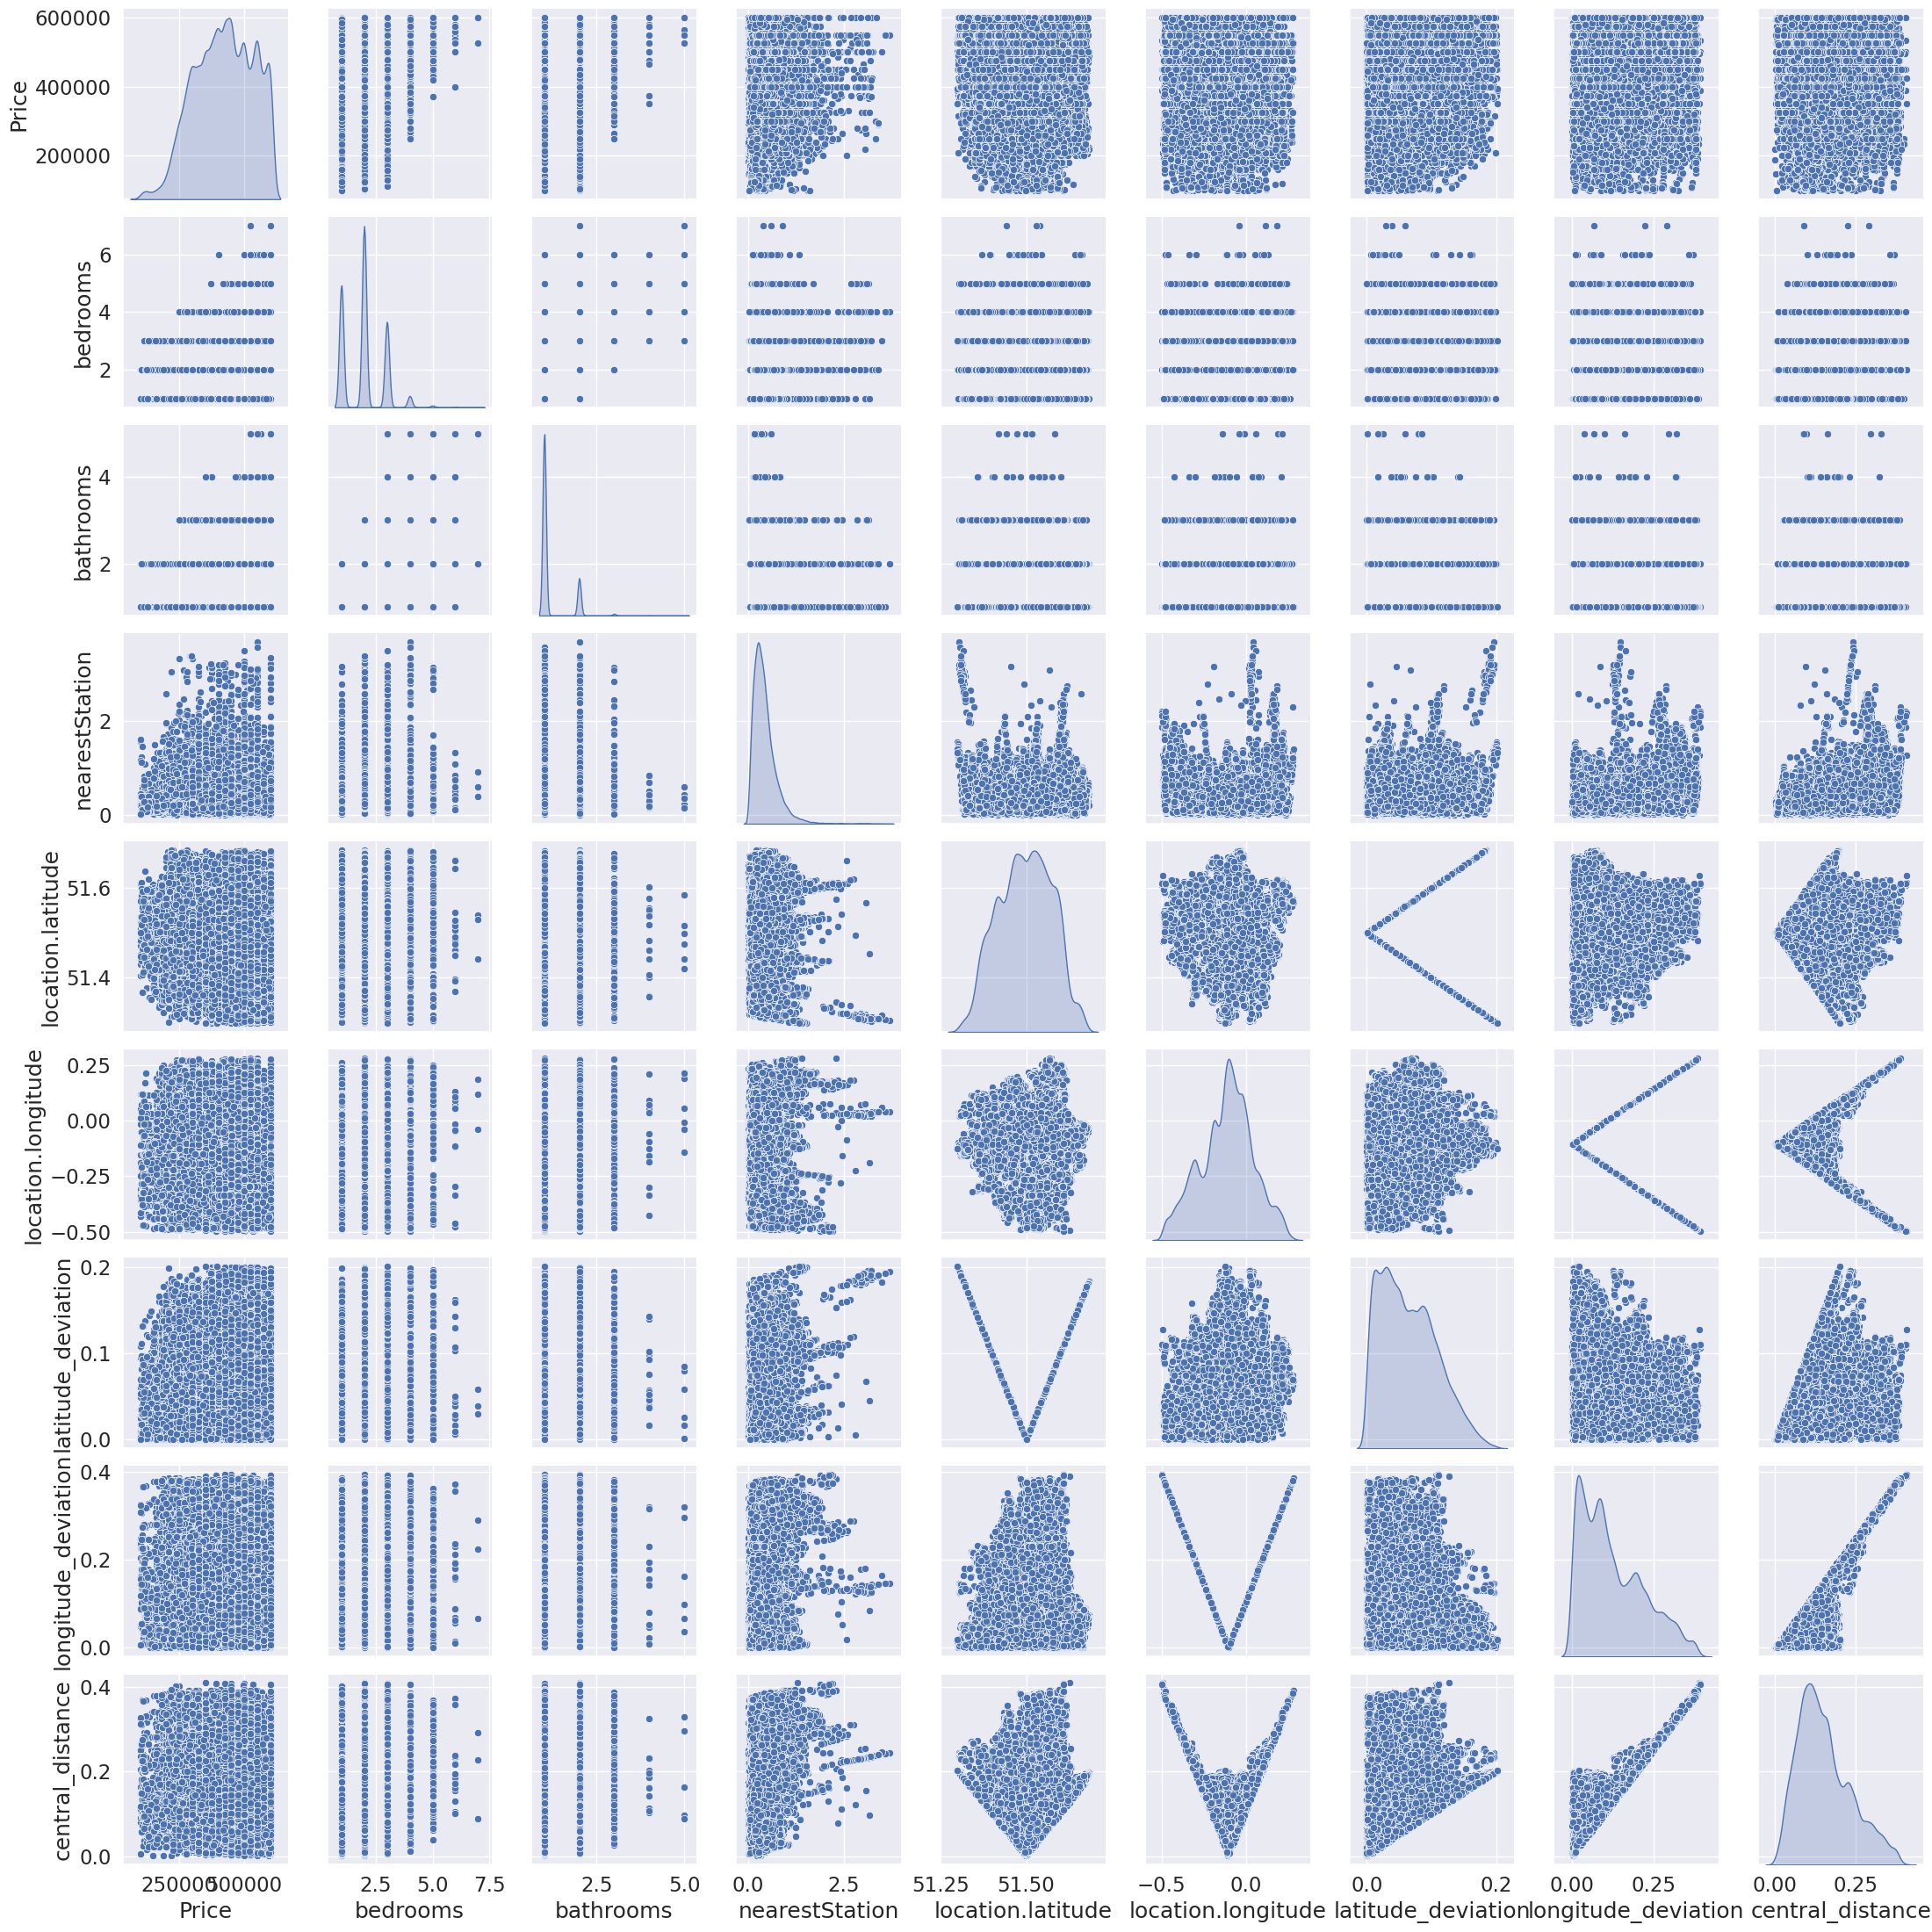

In [185]:
sns.pairplot(df, diag_kind='kde')

In [186]:
#df.isna().any()
df.isna().sum()

Price                  0
bedrooms               0
bathrooms              0
nearestStation         0
location.latitude      0
location.longitude     0
latitude_deviation     0
longitude_deviation    0
tenure.tenureType      0
date                   0
central_distance       0
dtype: int64

In [187]:
df = df.dropna()
print(f"{old_length} ==> {len(df)}")
old_length = len(df)
df.describe()

45448 ==> 45448


Price      bedrooms     bathrooms  nearestStation  \
count   45448.000000  45448.000000  45448.000000    45448.000000   
mean   421306.624164      1.980857      1.185377        0.435404   
std    110722.486538      0.823010      0.411488        0.319498   
min    100000.000000      1.000000      1.000000        0.000000   
25%    339983.750000      1.000000      1.000000        0.225384   
50%    425000.000000      2.000000      1.000000        0.365839   
75%    500000.000000      2.000000      1.000000        0.556579   
max    600000.000000      7.000000      5.000000        3.687893   

       location.latitude  location.longitude  latitude_deviation  \
count       45448.000000        45448.000000        45448.000000   
mean           51.495933           -0.113922            0.064672   
std             0.077547            0.155743            0.042936   
min            51.298317           -0.498315            0.000000   
25%            51.437319           -0.211164            0.028738   
50%            51.498232           -0.103070            0.058940   
75%            51.555636           -0.011817            0.094838   
max            51.683185            0.279726            0.201161   

       longitude_deviation  central_distance  
count         45448.000000      45448.000000  
mean              0.123526          0.153514  
std               0.095250          0.082405  
min               0.000000          0.000683  
25%               0.043226          0.091709  
50%               0.098472          0.137882  
75%               0.191662          0.204140  
max               0.393095          0.409263

In [188]:
df_features = df.drop(LABEL, axis=1)
df_features

bedrooms  bathrooms  nearestStation  location.latitude  \
14520525        3.0        1.0        0.274316          51.529950   
27953107        2.0        2.0        0.305845          51.549390   
33593487        2.0        1.0        0.438045          51.447180   
35271294        2.0        1.0        0.399307          51.449568   
44749111        2.0        1.0        0.410550          51.370050   
...             ...        ...             ...                ...   
126179018       2.0        1.0        0.682879          51.370651   
126179672       3.0        2.0        0.545665          51.357170   
126180107       2.0        1.0        0.191407          51.531415   
126180704       2.0        1.0        0.308609          51.543141   
126181118       2.0        1.0        0.238489          51.424589   

           location.longitude  latitude_deviation  longitude_deviation  \
14520525            -0.207020            0.030472             0.101800   
27953107            -0.482600            0.049912             0.377380   
33593487            -0.338770            0.052298             0.233550   
35271294            -0.140154            0.049910             0.034934   
44749111            -0.212410            0.129428             0.107190   
...                       ...                 ...                  ...   
126179018           -0.238346            0.128827             0.133126   
126179672           -0.074740            0.142308             0.030480   
126180107           -0.052964            0.031937             0.052256   
126180704            0.011498            0.043663             0.116718   
126181118           -0.206790            0.074889             0.101570   

           tenure.tenureType       date  central_distance  
14520525           LEASEHOLD 2022-05-24          0.106263  
27953107           LEASEHOLD 2022-06-16          0.380666  
33593487            FREEHOLD 2022-11-07          0.239334  
35271294           LEASEHOLD 2021-06-14          0.060921  
44749111            FREEHOLD 2021-11-10          0.168051  
...                      ...        ...               ...  
126179018           FREEHOLD 2022-08-18          0.185254  
126179672          LEASEHOLD 2022-08-18          0.145536  
126180107          LEASEHOLD 2022-08-18          0.061243  
126180704          LEASEHOLD 2022-08-18          0.124618  
126181118  SHARE_OF_FREEHOLD 2022-08-18          0.126194  

[45448 rows x 10 columns]

In [189]:
use_one_hot_encoding_not_dummies = False

if use_one_hot_encoding_not_dummies:
    raise NotImplementedError('not implemented one hot encoding yet')

    #from sklearn.preprocessing import OneHotEncoder
    #tenure_encoder = OneHotEncoder()
    #df_tenure_type = tenure_encoder.fit_transform(df_features[['tenure.tenureType']])
else:
    for column in categories:
        df_features = pd.concat([df_features, pd.get_dummies(df_features[column], prefix=column, drop_first=True)],
                                axis=1)
        df_features.drop([column], axis=1, inplace=True)  # now drop the original column (you don't need it anymore),

features_corr = df_features.corr()
features_corr

bedrooms  bathrooms  nearestStation  \
bedrooms                             1.000000   0.328976        0.244747   
bathrooms                            0.328976   1.000000        0.049761   
nearestStation                       0.244747   0.049761        1.000000   
location.latitude                    0.003476  -0.005180        0.023500   
location.longitude                   0.118063   0.016333        0.043703   
latitude_deviation                   0.196191   0.035412        0.161779   
longitude_deviation                  0.180718   0.077476        0.319729   
central_distance                     0.258365   0.101040        0.375925   
tenure.tenureType_FREEHOLD           0.591387   0.082498        0.313497   
tenure.tenureType_LEASEHOLD         -0.459316  -0.035380       -0.228103   
tenure.tenureType_SHARE_OF_FREEHOLD -0.113886  -0.058854       -0.083442   

                                     location.latitude  location.longitude  \
bedrooms                                      0.003476            0.118063   
bathrooms                                    -0.005180            0.016333   
nearestStation                                0.023500            0.043703   
location.latitude                             1.000000            0.095413   
location.longitude                            0.095413            1.000000   
latitude_deviation                           -0.123173            0.046741   
longitude_deviation                           0.188762           -0.168638   
central_distance                              0.134101           -0.175744   
tenure.tenureType_FREEHOLD                    0.003167            0.137193   
tenure.tenureType_LEASEHOLD                   0.024552           -0.070039   
tenure.tenureType_SHARE_OF_FREEHOLD          -0.041306           -0.081586   

                                     latitude_deviation  longitude_deviation  \
bedrooms                                       0.196191             0.180718   
bathrooms                                      0.035412             0.077476   
nearestStation                                 0.161779             0.319729   
location.latitude                             -0.123173             0.188762   
location.longitude                             0.046741            -0.168638   
latitude_deviation                             1.000000            -0.185352   
longitude_deviation                           -0.185352             1.000000   
central_distance                               0.152762             0.927545   
tenure.tenureType_FREEHOLD                     0.223598             0.274410   
tenure.tenureType_LEASEHOLD                   -0.209285            -0.176185   
tenure.tenureType_SHARE_OF_FREEHOLD            0.010744            -0.108407   

                                     central_distance  \
bedrooms                                     0.258365   
bathrooms                                    0.101040   
nearestStation                               0.375925   
location.latitude                            0.134101   
location.longitude                          -0.175744   
latitude_deviation                           0.152762   
longitude_deviation                          0.927545   
central_distance                             1.000000   
tenure.tenureType_FREEHOLD                   0.363418   
tenure.tenureType_LEASEHOLD                 -0.257032   
tenure.tenureType_SHARE_OF_FREEHOLD         -0.107836   

                                     tenure.tenureType_FREEHOLD  \
bedrooms                                               0.591387   
bathrooms                                              0.082498   
nearestStation                                         0.313497   
location.latitude                                      0.003167   
location.longitude                                     0.137193   
latitude_deviation                                     0.223598   
longitude_deviation                                    0.274410   
centr

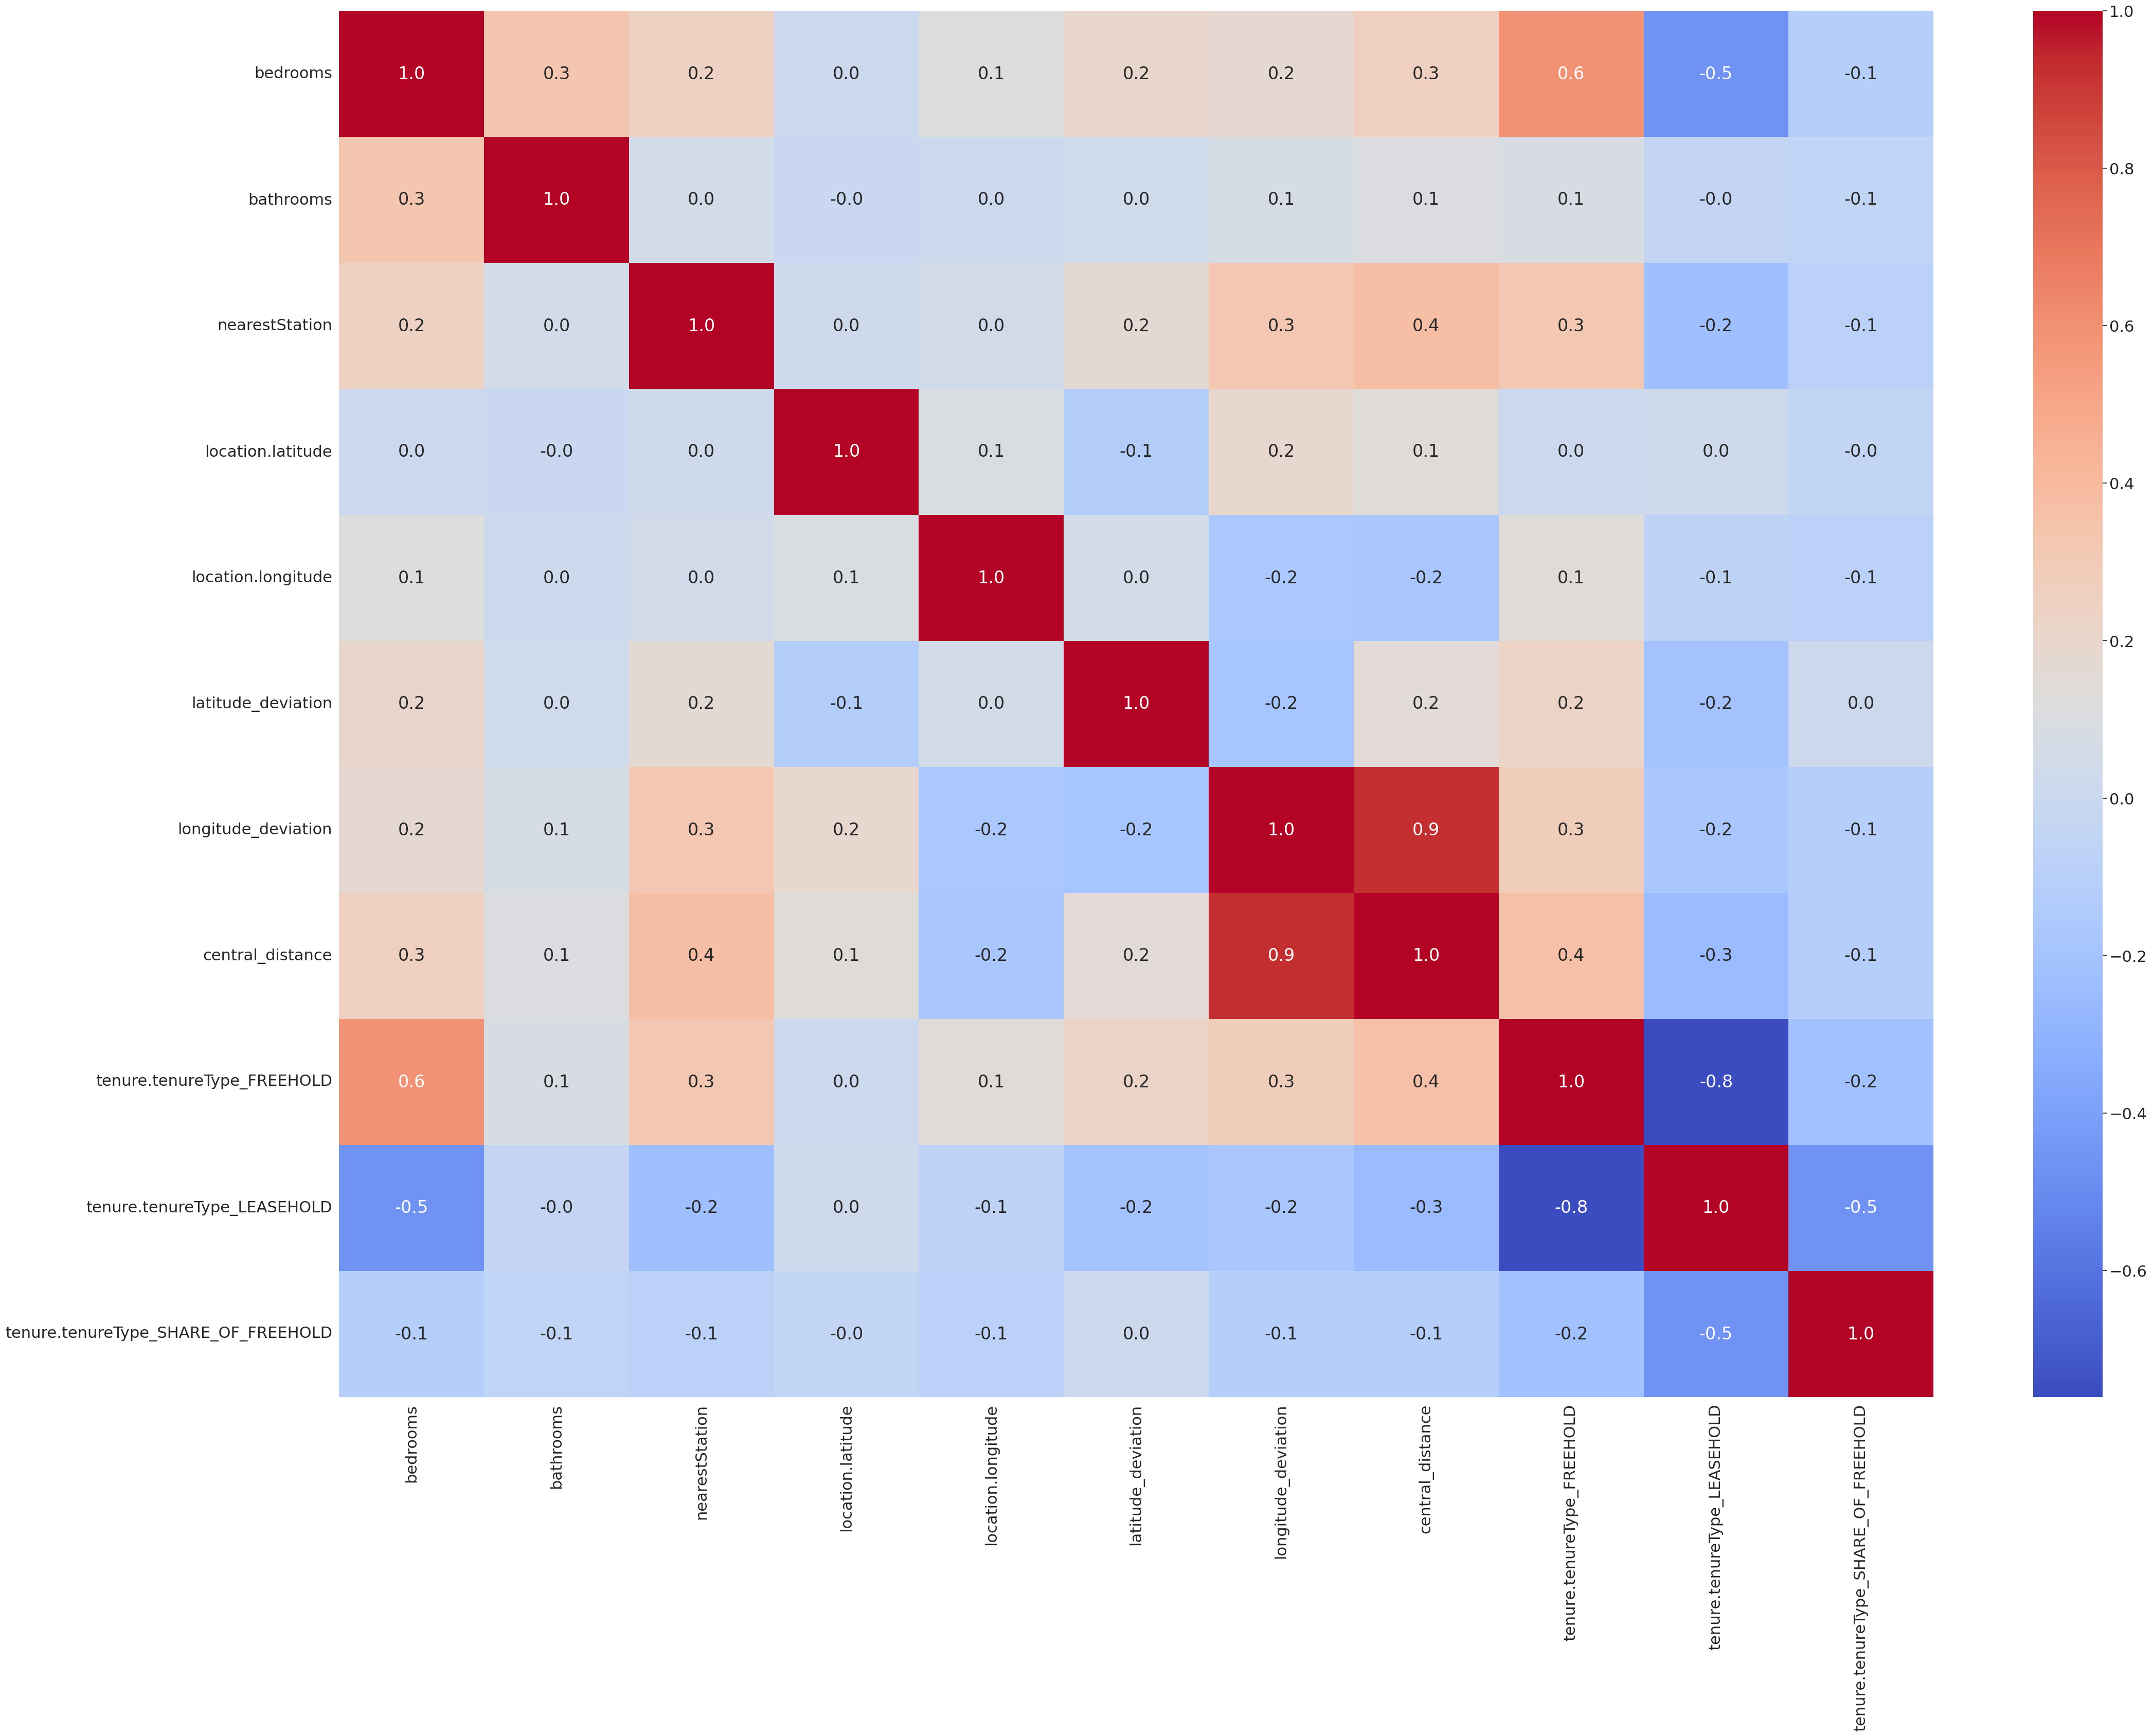

In [190]:
sns.set(font_scale=2)
plt.figure(figsize=(50, 35))
ax = sns.heatmap(features_corr, annot=True, fmt='.1f', cmap='coolwarm')

In [191]:
data_corr = df.corr()
data_corr_dict = data_corr["Price"].sort_values(ascending=False).to_dict()
data_corr_dict

{'Price': 1.0,
 'bedrooms': 0.46500257917045595,
 'bathrooms': 0.2526893702607734,
 'location.latitude': 0.0549839026382005,
 'nearestStation': -0.009799482241639575,
 'location.longitude': -0.0646800794495967,
 'latitude_deviation': -0.07706013907444215,
 'longitude_deviation': -0.0783304488876165,
 'central_distance': -0.11343339064256515}

In [192]:
#print the most positively correlated features
pos_corr = {k: v for k, v in data_corr_dict.items() if v > 0.1 and v != 1}
pos_corr

{'bedrooms': 0.46500257917045595, 'bathrooms': 0.2526893702607734}

In [193]:
#print the most negatively correlated features
neg_corr = {k: v for k, v in data_corr_dict.items() if v < -0.1}
neg_corr

{'central_distance': -0.11343339064256515}

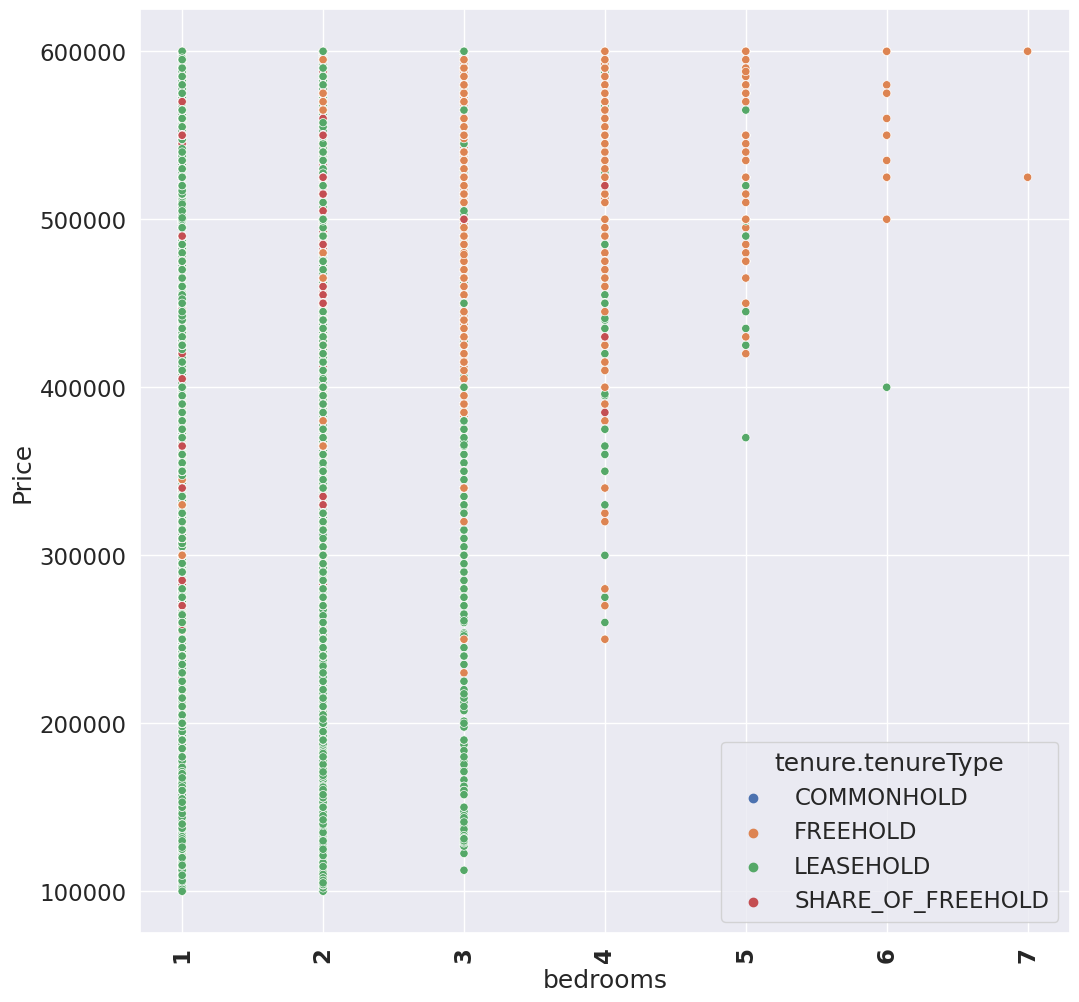

In [194]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.scatterplot(x='bedrooms', y='Price', data=df, hue='tenure.tenureType')
plt.xticks(weight='bold', rotation=90)
plt.show()

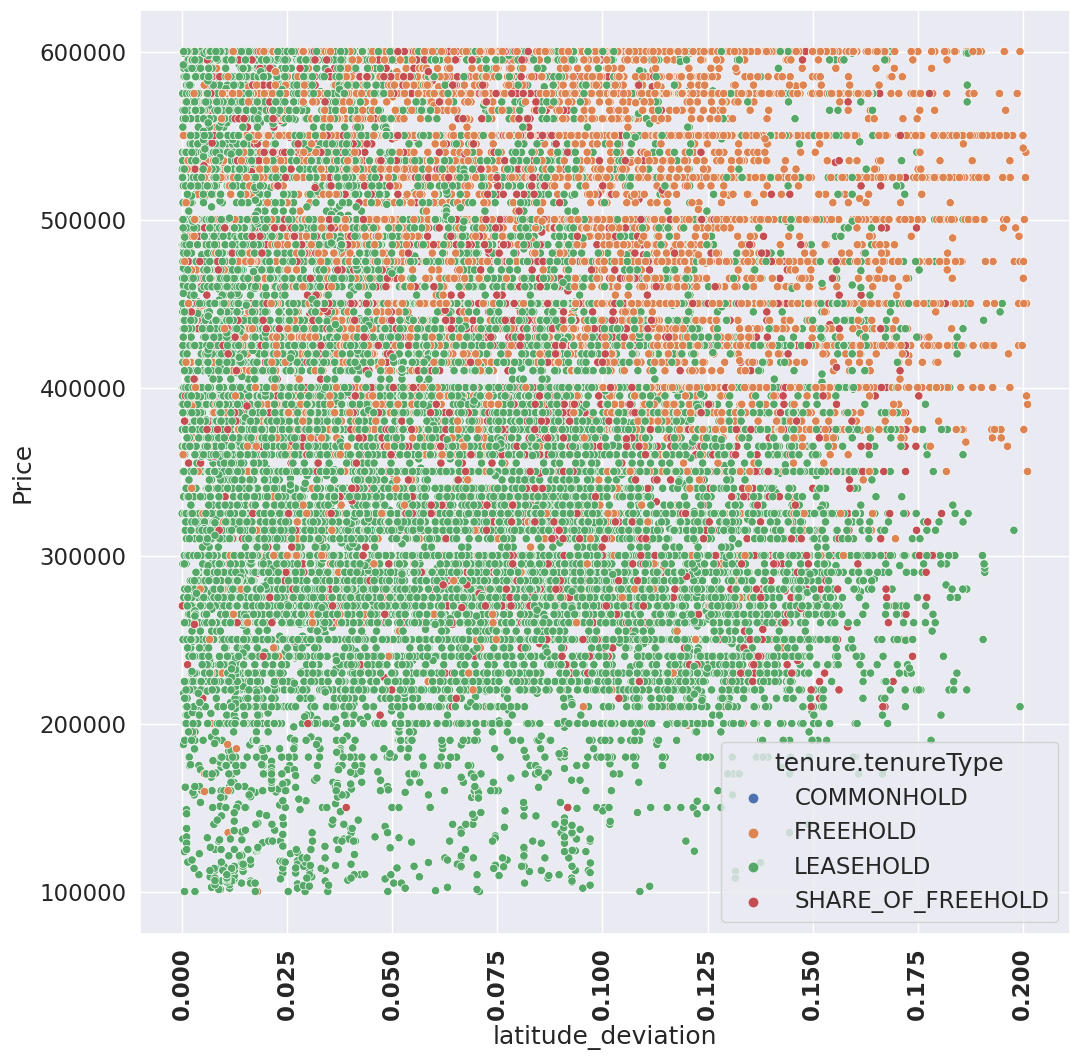

In [195]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.scatterplot(x='latitude_deviation', y='Price', data=df, hue='tenure.tenureType')
plt.xticks(weight='bold', rotation=90)
plt.show()

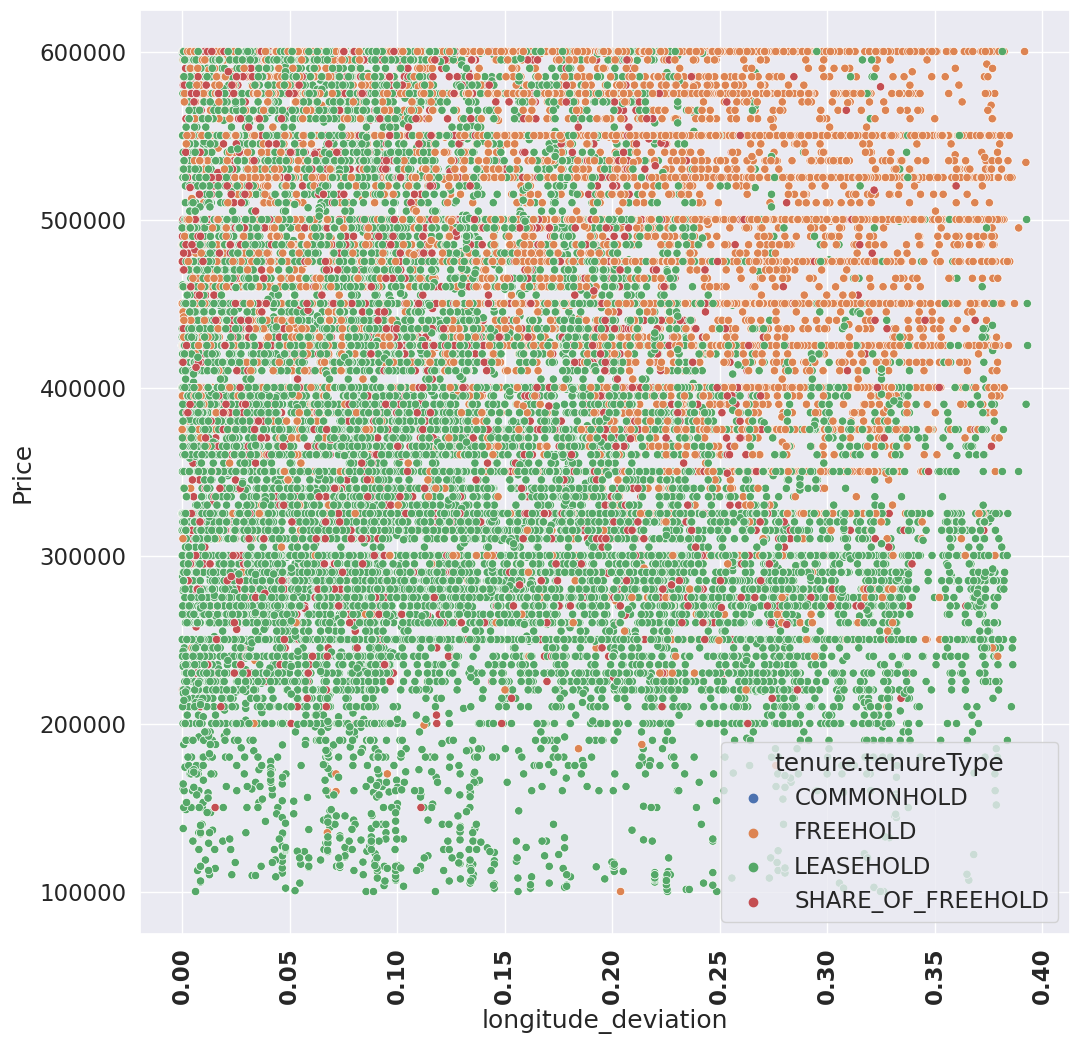

In [196]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.scatterplot(x='longitude_deviation', y='Price', data=df, hue='tenure.tenureType')
plt.xticks(weight='bold', rotation=90)
plt.show()

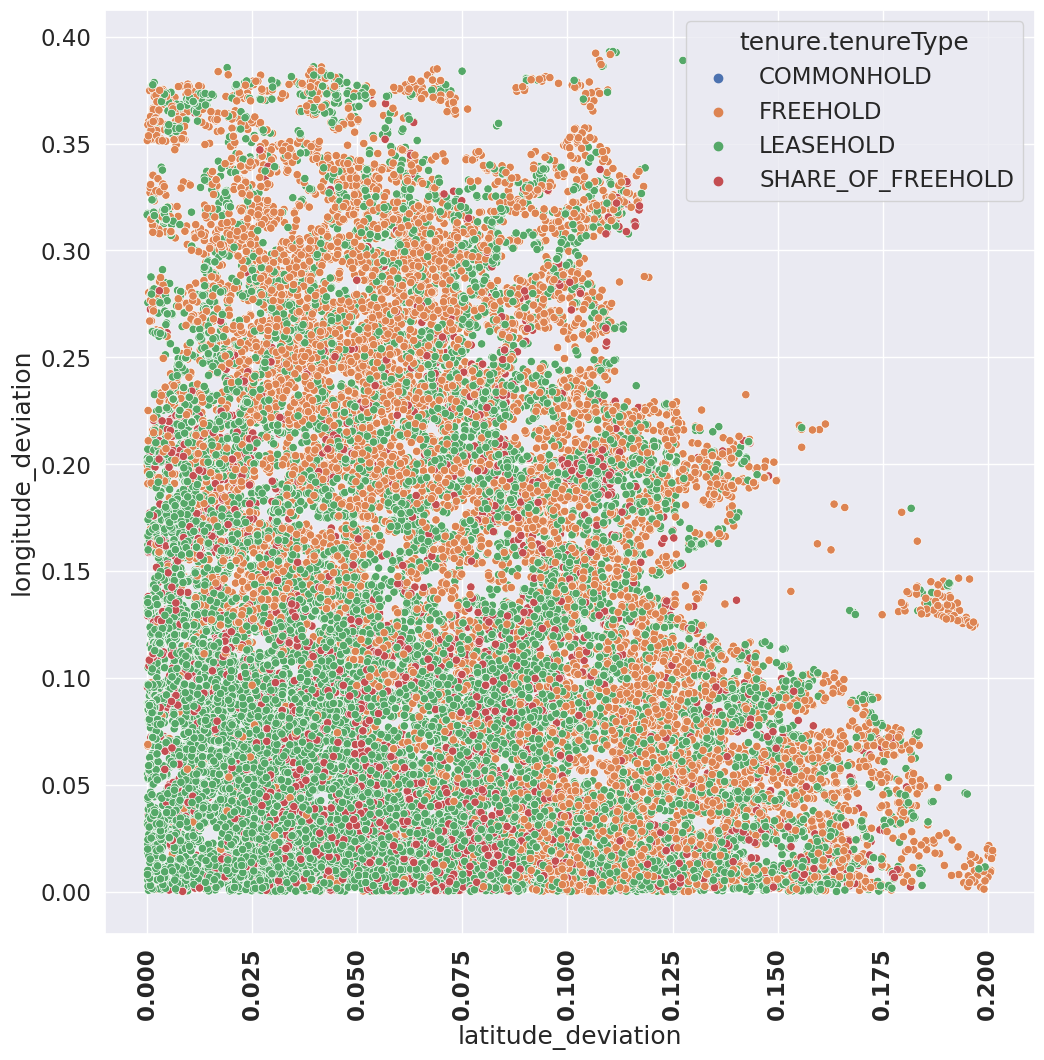

In [197]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.scatterplot(x='latitude_deviation', y='longitude_deviation', data=df, hue='tenure.tenureType')
plt.xticks(weight='bold', rotation=90)
plt.show()

<div id = 3 style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#b08888;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px;
           display:flex;
            justify-content:center;">

<h2 style="padding: 2rem;
              color:white;
          text-align:center;
          margin:0 auto;
          ">
    Exploration for imputation


</h2>
</div>

In [198]:
df['central_distance'] = (df['latitude_deviation'] ** 2 + df['longitude_deviation'] ** 2) ** 0.5
df

Price  bedrooms  bathrooms  nearestStation  location.latitude  \
14520525   550000       3.0        1.0        0.274316          51.529950   
27953107   400000       2.0        2.0        0.305845          51.549390   
33593487   579950       2.0        1.0        0.438045          51.447180   
35271294   370000       2.0        1.0        0.399307          51.449568   
44749111   475000       2.0        1.0        0.410550          51.370050   
...           ...       ...        ...             ...                ...   
126179018  575000       2.0        1.0        0.682879          51.370651   
126179672  600000       3.0        2.0        0.545665          51.357170   
126180107  419999       2.0        1.0        0.191407          51.531415   
126180704  475000       2.0        1.0        0.308609          51.543141   
126181118  525000       2.0        1.0        0.238489          51.424589   

           location.longitude  latitude_deviation  longitude_deviation  \
14520525            -0.207020            0.030472             0.101800   
27953107            -0.482600            0.049912             0.377380   
33593487            -0.338770            0.052298             0.233550   
35271294            -0.140154            0.049910             0.034934   
44749111            -0.212410            0.129428             0.107190   
...                       ...                 ...                  ...   
126179018           -0.238346            0.128827             0.133126   
126179672           -0.074740            0.142308             0.030480   
126180107           -0.052964            0.031937             0.052256   
126180704            0.011498            0.043663             0.116718   
126181118           -0.206790            0.074889             0.101570   

           tenure.tenureType       date  central_distance  
14520525           LEASEHOLD 2022-05-24          0.106263  
27953107           LEASEHOLD 2022-06-16          0.380666  
33593487            FREEHOLD 2022-11-07          0.239334  
35271294           LEASEHOLD 2021-06-14          0.060921  
44749111            FREEHOLD 2021-11-10          0.168051  
...                      ...        ...               ...  
126179018           FREEHOLD 2022-08-18          0.185254  
126179672          LEASEHOLD 2022-08-18          0.145536  
126180107          LEASEHOLD 2022-08-18          0.061243  
126180704          LEASEHOLD 2022-08-18          0.124618  
126181118  SHARE_OF_FREEHOLD 2022-08-18          0.126194  

[45448 rows x 11 columns]

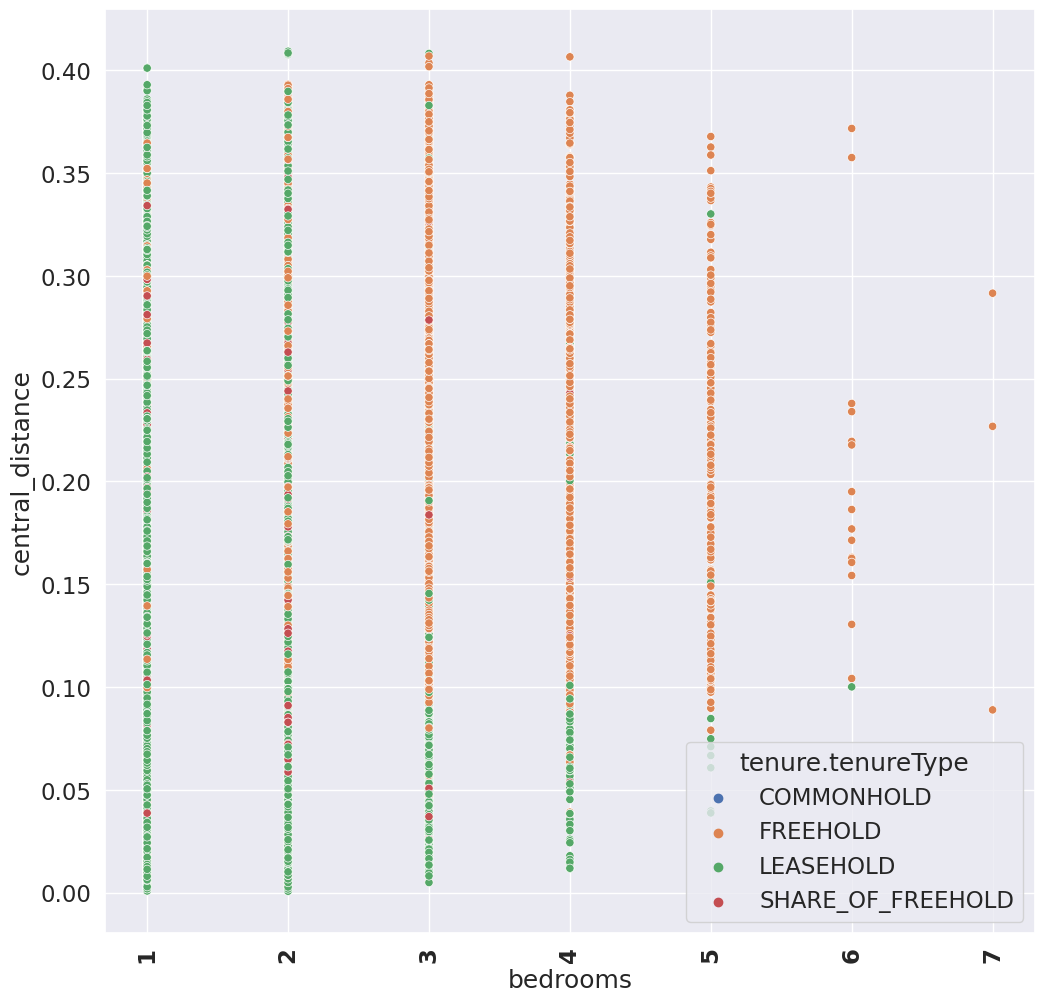

In [199]:

plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.scatterplot(x='bedrooms', y='central_distance', data=df, hue='tenure.tenureType')
plt.xticks(weight='bold', rotation=90)
plt.show()

In [200]:
#df.groupby(['tenure.tenureType','bedrooms']).agg({'bedrooms':['mean','min','max']})
df.groupby(['tenure.tenureType', 'bedrooms']).agg('count')

Price  bathrooms  nearestStation  \
tenure.tenureType bedrooms                                     
COMMONHOLD        1.0           2          2               2   
                  2.0           5          5               5   
                  3.0           0          0               0   
                  4.0           0          0               0   
                  5.0           0          0               0   
                  6.0           0          0               0   
                  7.0           0          0               0   
FREEHOLD          1.0         337        337             337   
                  2.0        3231       3231            3231   
                  3.0        6947       6947            6947   
                  4.0        1111       1111            1111   
                  5.0         190        190             190   
                  6.0          16         16              16   
                  7.0           3          3               3   
LEASEHOLD         1.0       11528      11528           11528   
                  2.0       14247      14247           14247   
                  3.0        2308       2308            2308   
                  4.0         155        155             155   
                  5.0          11         11              11   
                  6.0           1          1               1   
                  7.0           0          0               0   
SHARE_OF_FREEHOLD 1.0        1942       1942            1942   
                  2.0        2973       2973            2973   
                  3.0         416        416             416   
                  4.0          25         25              25   
                  5.0           0          0               0   
                  6.0           0          0               0   
                  7.0           0          0               0   

                            location.latitude  location.longitude  \
tenure.tenureType bedrooms                                          
COMMONHOLD        1.0                       2                   2   
                  2.0                       5                   5   
                  3.0                       0                   0   
                  4.0                       0                   0   
                  5.0                       0                   0   
                  6.0                       0                   0   
                  7.0                       0                   0   
FREEHOLD          1.0                     337                 337   
                  2.0                    3231                3231   
                  3.0                    6947                6947   
                  4.0                    1111                1111   
                  5.0                     190                 190   
                  6.0                      16                  16   
                  7.0                       3                   3   
LEASEHOLD         1.0                   11528               11528   
                  2.0                   14247               14247   
                  3.0                    2308                2308   
                  4.0                     155                 155   
                  5.0                      11                  11   
                  6.0                       1                   1   
                  7.0                       0                   0   
SHARE_OF_FREEHOLD 1.0                    1942                1942   
                  2.0                    2973                2973   
                  3.0                     416                 416   
                  4.0                      25                  25   
                  5.0                       0                   0   
                  6.0                       0                   0   
                  7.0                       0                   0   

                            latitude